# Autogen

- [Autogen](https://www.microsoft.com/en-us/research/project/autogen/)
- [Autogen GitHub](https://github.com/microsoft/autogen)
- [Autogen Downloads](https://microsoft.github.io/autogen/stable/)
- [LLF-Bench](https://github.com/microsoft/LLF-Bench)
- [Magentic-One](https://microsoft.github.io/autogen/stable/user-guide/agentchat-user-guide/magentic-one.html)
- [AgentChat](https://microsoft.github.io/autogen/stable/user-guide/agentchat-user-guide/index.html)
- [Autogen Studio](https://microsoft.github.io/autogen/stable/user-guide/autogenstudio-user-guide/index.html)
- [Autogent Core Quickstart](https://microsoft.github.io/autogen/stable/user-guide/core-user-guide/quickstart.html)
- [Autogen Community Extensions](https://microsoft.github.io/autogen/stable/user-guide/extensions-user-guide/discover.html)
- [Autogen API Reference](https://microsoft.github.io/autogen/stable/reference/index.html)
- [Autogen Notebook Examples](https://microsoft.github.io/autogen/0.2/docs/Examples/?utm_source=chatgpt.com)
- [AG2 Github](https://github.com/ag2ai/ag2)
- [AG2 Website](https://ag2.ai/)

​Microsoft AutoGen is an open-source framework designed to facilitate the creation of AI agents and enable collaboration among multiple agents to address complex tasks. It provides a structured environment for developing agentic AI applications, emphasizing modularity, scalability, and ease of use. 

**Key Features of AutoGen:**

- **Asynchronous Messaging:** Agents communicate through asynchronous messages, supporting both event-driven and request/response interaction patterns.

- **Modular and Extensible Architecture:** The framework allows for easy customization with pluggable components, including custom agents, tools, memory modules, and models.

- **Observability and Debugging Tools:** Built-in tools provide tracking, tracing, and debugging capabilities for agent interactions and workflows, with support for industry-standard observability protocols like OpenTelemetry.

- **Scalability and Distribution:** Users can design complex, distributed agent networks that operate seamlessly across various environments.

- **Cross-Language Support:** AutoGen supports interoperability between agents built in different programming languages, currently including Python and .NET, with plans for additional languages.

**Developer Tools:**

To complement the framework, Microsoft offers [Magentic-One](https://microsoft.github.io/autogen/stable/user-guide/agentchat-user-guide/magentic-one.html) and [AutoGen Studio](https://microsoft.github.io/autogen/stable/user-guide/autogenstudio-user-guide/index.html), a low-code interface that enables rapid prototyping and testing of multi-agent workflows. AutoGen Studio provides features such as a drag-and-drop team builder, real-time agent updates, and interactive debugging tools, making it accessible for developers with varying levels of coding expertise. 

**Getting Started:**

Developers interested in utilizing AutoGen can access the framework and its resources through the official GitHub repository. The repository includes comprehensive documentation, installation guides, and examples to assist in building and deploying agentic AI applications. 

For a visual introduction and deeper understanding of AutoGen's capabilities, you might find the following video helpful:


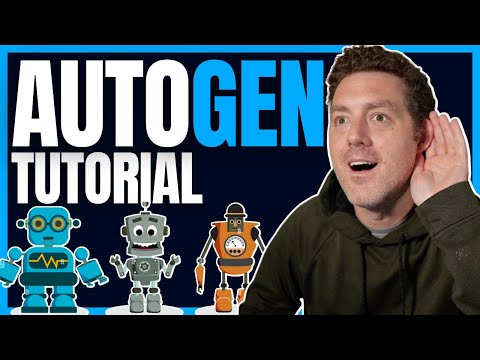

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('vU2S6dVf79M', width=800, height=450)

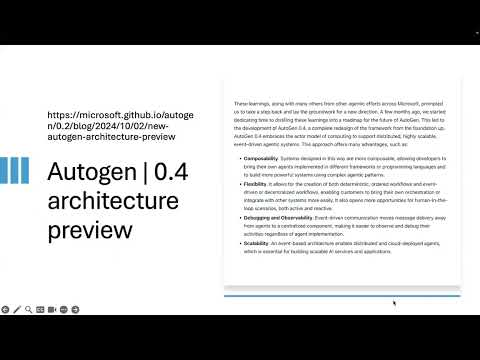

In [2]:
#https://youtu.be/vQyjKF-DUd0
from IPython.display import YouTubeVideo
YouTubeVideo('vQyjKF-DUd0', width=800, height=450)

AutoGen has undergone significant changes from version 0.2 to version 0.4, focusing on enhancing scalability, flexibility, and developer experience. Here are the key differences:

**1. Architectural Overhaul:**
- **Event-Driven Actor Model:** Version 0.4 adopts an event-driven actor model, enabling distributed and highly scalable agentic systems. This design enhances composability, allowing developers to integrate agents implemented in various frameworks or programming languages. 

**2. API Layering:**
- **Core API:** Provides the foundational components for building event-driven agentic systems.
- **AgentChat API:** Built atop the Core API, it offers a high-level framework for constructing interactive agent applications, replacing the previous architecture in version 0.2.
- **Extensions API:** Facilitates third-party integrations and implementations, such as Azure code executors and OpenAI model clients.

**3. Asynchronous Communication:**
- Version 0.4 introduces asynchronous messaging, allowing agents to communicate through both event-driven and request/response interaction patterns. This shift enhances the flexibility and responsiveness of agent interactions. 

**4. Modular and Extensible Design:**
- The new version emphasizes a modular architecture, enabling developers to customize systems with pluggable components, including custom agents, tools, memory modules, and models. This design supports the creation of proactive and long-running agents using event-driven patterns.

**5. Enhanced Observability and Debugging:**
- Built-in metric tracking, message tracing, and debugging tools provide improved monitoring and control over agent interactions and workflows, addressing previous challenges in debugging and scaling agent applications.

**6. Package Restructuring:**
- With version 0.4, AutoGen has restructured its Python packages into `autogen-core`, `autogen-agentchat`, and `autogen-ext` to align with the new architecture. 

For users transitioning from version 0.2 to 0.4, a comprehensive migration guide is available, detailing the necessary steps and changes. 

These advancements in AutoGen 0.4 aim to provide a more robust, scalable, and developer-friendly framework for building AI agents. 

In [5]:
#pip install --quiet -U 'autogen-ext[openai]'

In [6]:
#pip install --quiet -U autogen-agentchat python-dotenv

In [1]:
# %%capture --no-stderr
# %pip install --quiet -U autogen-agentchat 'autogen-ext[openai]' python-dotenv
# simple test to ensure it's functional

import os
import asyncio
from dotenv import load_dotenv
from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_agentchat.messages import TextMessage  # Import the TextMessage class
from autogen_core import CancellationToken  # Import CancellationToken

# Load environment variables from .env file
load_dotenv()

# Retrieve the OpenAI API key from environment variables
openai_api_key = os.getenv("OPENAI_API_KEY")
if not openai_api_key:
    raise ValueError("OPENAI_API_KEY not found in environment variables. Check your .env file.")

# Initialize the OpenAI model client with the API key
model_client = OpenAIChatCompletionClient(model="gpt-4o", api_key=openai_api_key)

# Create the assistant agent
assistant = AssistantAgent(
    name="assistant",
    system_message="You are a helpful assistant.",
    model_client=model_client,
)

# Define the main asynchronous function
async def main():
    # Define the user's input
    user_input = "Hello! How can I use AutoGen to build AI agents?"
    
    # Create a TextMessage object
    user_message = TextMessage(content=user_input, source="user")
    
    # Create a cancellation token
    cancellation_token = CancellationToken()
    
    # Send the user's input to the assistant agent and get the response
    response = await assistant.on_messages(
        [user_message],
        cancellation_token
    )
    
    # Print the assistant's response
    print("Assistant:", response.chat_message.content)

# Run the main function
await main()


Assistant: Hello! AutoGen is a framework that simplifies the creation and deployment of AI agents by providing tools to define, manage, and interact with them. Here's a general guide on how you can use AutoGen to build AI agents:

1. **Installation**: 
   - First, ensure you have Python installed on your machine. 
   - Install AutoGen via pip:
     ```bash
     pip install autogen
     ```

2. **Define Your Agents**:
   - You can define agents by specifying their behaviors, goals, and interactions. AutoGen provides a way to define these agents using configuration files or code. For example:
     ```python
     from autogen import Agent

     class MyAgent(Agent):
         def __init__(self):
             super().__init__(name="MyAgent")

         def act(self, observation):
             # Define how the agent acts based on observations
             action = some_logic_based_on_observation(observation)
             return action
     ```

3. **Create an Environment**:
   - Agents often 

Assistant: Hello! AutoGen is a framework designed to simplify the creation and management of AI agents that can interact with each other and with humans in a dynamic environment. Here's a basic step-by-step guide on how you can use AutoGen to build AI agents:

1. **Installation**:
   Make sure you have AutoGen installed. If it's available as a Python package, you can typically install it using pip:

   ```bash
   pip install autogen-framework
   ```

   Replace `autogen-framework` with the actual package name if it differs.

2. **Understand the Framework**:
   Familiarize yourself with the core concepts of AutoGen, such as:

   - **Agents**: These are the AI entities that can perform actions, interact with each other, and learn from the environment.
   - **Environment**: This is the setting in which agents operate and interact. It can include various tasks and objectives for agents.
   - **Schedulers**: Mechanisms that manage agent interactions and sequence actions in the environment.

3. **Define Your Agents**:
   Decide what kind of agents you want to create. This involves specifying their roles, capabilities, and goals. You will need to define the logic and behavior for each agent. For example:

   ```python
   from autogen import Agent

   class MyAgent(Agent):
       def __init__(self, name):
           super().__init__(name)
       
       def perform_action(self):
           # Define what actions this agent can perform
           print(f"{self.name} is performing an action")
   ```

4. **Set Up the Environment**:
   Create the environment where your agents will operate. This involves specifying rules, resources, and any other elements that define the operational context.

   ```python
   from autogen import Environment

   class MyEnvironment(Environment):
       def __init__(self):
           super().__init__()
       
       def update(self):
           # Update the state of the environment
           print("Environment is updating")
   ```

5. **Manage Interactions**:
   Use schedulers or other mechanisms provided by AutoGen to handle how and when agents interact with each other and the environment.

   ```python
   from autogen import Scheduler

   class MyScheduler(Scheduler):
       def __init__(self, agents, environment):
           super().__init__(agents, environment)
       
       def run(self):
           for agent in self.agents:
               agent.perform_action()
           self.environment.update()
   ```

6. **Execute and Iterate**:
   Initialize your agents and environment, and use the scheduler to run your multi-agent system. You can iterate on your design by refining agent behaviors and environmental interactions.

   ```python
   agent1 = MyAgent("Agent1")
   agent2 = MyAgent("Agent2")
   environment = MyEnvironment()
   scheduler = MyScheduler([agent1, agent2], environment)

   scheduler.run()
   ```

7. **Extend and Customize**:
   AutoGen likely provides various tools and utilities to extend functionality, like integrating machine learning models, processing human input, etc. Explore the documentation to discover additional features you can leverage to make your agents more sophisticated.

By following these steps and leveraging the capabilities of AutoGen, you can build and manage your own AI agents effectively. Be sure to check the specific documentation and resources available for AutoGen to get the most out of the framework.

## Handle multiple user queries
Here's an example of how to set up an AutoGen v0.4 assistant agent that can handle multiple user queries in a Jupyter Notebook. This example demonstrates how to initialize the agent, process user inputs, and handle multiple interactions within a single session.

In [26]:
# good example
import os
import time
import asyncio
import logging
import openai
import requests
import yaml
import re
from requests.utils import quote
from dotenv import load_dotenv

from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken

# Uncomment these lines if you want *raw* HTTP-level debug output:
"""
import http.client as http_client
http_client.HTTPConnection.debuglevel = 1
logging.getLogger("http.client").setLevel(logging.DEBUG)
logging.getLogger("http.client").propagate = True
"""

# ---- Constants ----
EXIT_COMMANDS = {"exit", "quit", "!exit"}
CANCEL_COMMAND = "!cancel"
DEFAULT_MODEL = "gpt-4o"
DEFAULT_SYSTEM_MESSAGE = "You are a helpful assistant."
CONFIG_FILE = "config.yaml"
LOG_FILE = "log.txt"

# ---- Configure Very Verbose Logging ----
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)  # Set to DEBUG for very verbose output

# Remove any existing handlers (useful if re-running in Jupyter)
for handler in logger.handlers[:]:
    logger.removeHandler(handler)

file_handler = logging.FileHandler(LOG_FILE)
formatter = logging.Formatter(
    '%(asctime)s - %(levelname)s - %(module)s - %(funcName)s:%(lineno)d - %(message)s'
)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.debug("Logger initialized at DEBUG level. Very verbose mode is enabled.")

# ---------------------------------------------------------------------------
# Verbose client for the main assistant calls (GPT). Logs raw request/response.
# ---------------------------------------------------------------------------
class VerboseOpenAIChatCompletionClient(OpenAIChatCompletionClient):
    """
    An extension of OpenAIChatCompletionClient that logs detailed request/response data
    at INFO level, matching your prior logging style.
    """
    async def _send_request(self, messages, **kwargs):
        url = "https://api.openai.com/v1/chat/completions"
        logger.info(f"HTTP Request: POST {url} 'HTTP/1.1 200 OK'")
        response = await super()._send_request(messages, **kwargs)

        import json
        log_payload = {
            "type": "LLMCall",
            "messages": messages,
            "response": response
        }
        logger.info(json.dumps(log_payload))
        logger.debug("Received response from OpenAI (debug): %s", response)
        return response

# ---------------------------------------------------------------------------
# WeatherAgent for queries containing "weather"
# Now uses Fahrenheit data (&u) and parses temp_F, FeelsLikeF.
# ---------------------------------------------------------------------------
class WeatherAgent(AssistantAgent):
    """
    A specialized agent that queries wttr.in for weather data in Fahrenheit (USCS).
    """
    async def on_messages(self, messages, cancellation_token=None):
        user_message = messages[-1].content
        logger.debug(f"[WeatherAgent] Received message: {user_message}")

        city = self._extract_city(user_message)
        if not city:
            city = await self._extract_city_with_llm(user_message)
            if not city:
                response_text = (
                    "I'm not sure which city/state you want weather for. "
                    "Please specify the location clearly."
                )
                return TextMessage(content=response_text, source="assistant")

        weather_info = self._fetch_weather(city)
        if weather_info:
            response_text = f"The current weather in {city}:\n{weather_info}"
        else:
            response_text = f"Sorry, I couldn't fetch weather data for {city}."

        logger.debug(f"[WeatherAgent] Responding: {response_text}")
        return TextMessage(content=response_text, source="assistant")

    def _extract_city(self, text: str) -> str:
        """
        Improved approach to extract the city and state from user text.
        Handles more variations in input.
        """
        match = re.search(r"weather in\s+([A-Za-z\s]+(?:,\s*[A-Za-z]{2,})?)", text.lower())
        if match:
            city_name = match.group(1).strip()
            # Remove any remaining non-alphanumeric characters except spaces and commas
            city_name = re.sub(r"[^\w\s,]", "", city_name)
            # Convert multiple spaces to single spaces
            city_name = re.sub(r"\s+", " ", city_name)
            city_name = city_name.strip().title()  # Title case
            return city_name
        return None

    async def _extract_city_with_llm(self, user_text: str) -> str:
        """
        Uses GPT to extract the city and state/country, if present.
        If GPT can't find a city, returns None.
        """
        system_prompt = (
            "You are a location extraction assistant. Your task is to identify the city and state (or country) from user queries about the weather.\n"
            "Return ONLY the city and state/country, separated by a comma and a space. For example: 'Orlando, FL' or 'Tokyo, Japan'.\n"
            "If the query does not contain a location, or if you are unsure, return 'NONE'.\n"
            "Here are some examples:\n"
            "User: What is the weather in Orlando, FL?\n"
            "Assistant: Orlando, FL\n"
            "User: What is the weather in Washington, DC?\n"
            "Assistant: Washington, DC\n"
            "User: What is the weather in Virginia Beach, VA?\n"
            "Assistant: Virginia Beach, VA\n"
            "User: What is the weather in Tokyo, Japan?\n"
            "Assistant: Tokyo, Japan\n"
            "User: Tell me a joke\n"
            "Assistant: NONE\n"
        )

        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_text},
        ]

        try:
            completion = await self.parser_client.acompletion(
                messages=messages,
                temperature=0.0,
                max_tokens=30,
                top_p=1.0
            )
            raw_location = completion["choices"][0]["message"]["content"].strip()
            logger.debug(f"[WeatherAgent] LLM raw location extraction: '{raw_location}'")

            if raw_location.upper() == "NONE":
                logger.debug("[WeatherAgent] LLM returned 'NONE'.")
                return None

            # Split the string by comma and space
            parts = [part.strip() for part in raw_location.split(", ")]  # Split by comma and space

            if len(parts) == 2:
                city, state = parts
                cleaned_city = f"{city}, {state}"  # Reassemble with comma and space
                logger.debug(f"[WeatherAgent] Extracted city and state: '{cleaned_city}'")
                return cleaned_city
            elif len(parts) == 1:
                city = parts[0]
                cleaned_city = city
                logger.debug(f"[WeatherAgent] Extracted city only: '{cleaned_city}'")
                return cleaned_city
            else:
                logger.warning(f"[WeatherAgent] Unexpected LLM output format: '{raw_location}'")  # Log unexpected output
                return None

        except Exception as e:
            logger.error(f"Error calling GPT for location extraction: {e}", exc_info=True)
            return None

    def _fetch_weather(self, city: str) -> str:
        """
        Calls wttr.in with city name (URL-encoded) requesting Fahrenheit data.
        Prioritizes full state name for Florida.
        If that fails for a city, state abbreviation, tries the full state name.
        Returns a string like "Overcast, 60°F (feels like 58°F)"
        """
        try:
            # Prioritize full state name for Florida
            if "Orlando, Fl" in city or "Miami, Fl" in city:
                city_parts = city.split(", ")
                if len(city_parts) == 2:
                    city_name, state_abbreviation = city_parts
                    full_state_name = self._get_full_state_name(state_abbreviation)
                    if full_state_name:
                        full_city = f"{city_name}, {full_state_name}"
                        city = full_city  # Use the full city for the initial request

            city_encoded = quote(city)
            # Use &u for Fahrenheit
            url = f"https://wttr.in/{city_encoded}?format=j1&u"
            logger.debug(f"[WeatherAgent] Calling wttr.in URL: {url}")

            resp = requests.get(url, timeout=10)
            resp.raise_for_status()
            data = resp.json()
            logger.debug(f"[WeatherAgent] wttr.in response data: {data}")  # Log the data

            current = data.get("current_condition", [{}])[0]
            desc = current.get("weatherDesc", [{}])[0].get("value", "Unknown")
            temp_f = current.get("temp_F", "?")
            feels_like_f = current.get("FeelsLikeF", "?")
            return f"{desc}, {temp_f}°F (feels like {feels_like_f}°F)"

        except Exception as e:
            logger.error(f"Error fetching weather for '{city}': {e}", exc_info=True)

            # If the city contains a state abbreviation, try the full state name
            if ", " in city:
                city_parts = city.split(", ")
                if len(city_parts) == 2:
                    city_name, state_abbreviation = city_parts
                    full_state_name = self._get_full_state_name(state_abbreviation)
                    if full_state_name:
                        try:
                            full_city = f"{city_name}, {full_state_name}"
                            city_encoded = quote(full_city)
                            url = f"https://wttr.in/{city_encoded}?format=j1&u"
                            logger.debug(f"[WeatherAgent] Retrying with full state name: {url}")

                            resp = requests.get(url, timeout=10)
                            resp.raise_for_status()
                            data = resp.json()
                            logger.debug(f"[WeatherAgent] wttr.in retry response data: {data}") #Log retry data

                            current = data.get("current_condition", [{}])[0]
                            desc = current.get("weatherDesc", [{}])[0].get("value", "Unknown")
                            temp_f = current.get("temp_F", "?")
                            feels_like_f = current.get("FeelsLikeF", "?")
                            return f"{desc}, {temp_f}°F (feels like {feels_like_f}°F)"
                        except Exception as e:
                            logger.error(f"Error fetching weather for '{full_city}': {e}", exc_info=True)
                            return None
            return None

    def _get_full_state_name(self, state_abbreviation: str) -> str:
        """
        A simple helper function to convert state abbreviations to full names.
        """
        state_map = {
            "AL": "Alabama",
            "AK": "Alaska",
            "AZ": "Arizona",
            "AR": "Arkansas",
            "CA": "California",
            "CO": "Colorado",
            "CT": "Connecticut",
            "DE": "Delaware",
            "FL": "Florida",
            "GA": "Georgia",
            "HI": "Hawaii",
            "ID": "Idaho",
            "IL": "Illinois",
            "IN": "Indiana",
            "IA": "Iowa",
            "KS": "Kansas",
            "KY": "Kentucky",
            "LA": "Louisiana",
            "ME": "Maine",
            "MD": "Maryland",
            "MA": "Massachusetts",
            "MI": "Michigan",
            "MN": "Minnesota",
            "MS": "Mississippi",
            "MO": "Missouri",
            "MT": "Montana",
            "NE": "Nebraska",
            "NV": "Nevada",
            "NH": "New Hampshire",
            "NJ": "New Jersey",
            "NM": "New Mexico",
            "NY": "New York",
            "NC": "North Carolina",
            "ND": "North Dakota",
            "OH": "Ohio",
            "OK": "Oklahoma",
            "OR": "Oregon",
            "PA": "Pennsylvania",
            "RI": "Rhode Island",
            "SC": "South Carolina",
            "SD": "South Dakota",
            "TN": "Tennessee",
            "TX": "Texas",
            "UT": "Utah",
            "VT": "Vermont",
            "VA": "Virginia",
            "WA": "Washington",
            "WV": "West Virginia",
            "WI": "Wisconsin",
            "WY": "Wyoming",
            "DC": "District of Columbia",
        }
        return state_map.get(state_abbreviation.upper())

# ---------------------------------------------------------------------------
# Main ChatApplication
# ---------------------------------------------------------------------------
class ChatApplication:
    """
    An interactive chat application with:
      1) A main assistant agent (GPT-based)
      2) A weather agent (wttr.in, Fahrenheit)
    Logs are very verbose; any 'weather' queries route to WeatherAgent.
    """
    def __init__(self, config):
        logger.debug("Initializing ChatApplication with config: %s", config)
        self.config = config
        self.openai_api_key = self._load_api_key()

        # Create a verbose model client for GPT-based calls
        self.model_client = self._create_model_client()

        # The main "assistant" for general queries
        self.assistant = AssistantAgent(
            name="assistant",
            system_message=self.config.get("system_message", DEFAULT_SYSTEM_MESSAGE),
            model_client=self.model_client,
        )

        # A specialized "weather_agent" for weather queries
        self.weather_agent = WeatherAgent(
            name="weather_agent",
            system_message="You are a specialized weather agent.",
            model_client=self.model_client
        )

    def _load_api_key(self):
        """Loads the OpenAI API key from environment variables."""
        logger.debug("Attempting to load OPENAI_API_KEY from environment variables.")
        openai_api_key = os.getenv("OPENAI_API_KEY")
        if not openai_api_key:
            logger.error("OPENAI_API_KEY not found in environment variables.")
            raise ValueError("OPENAI_API_KEY not found. Check your .env file or env settings.")
        logger.debug("Successfully loaded OPENAI_API_KEY.")
        return openai_api_key

    def _create_model_client(self):
        """Creates the OpenAI client based on the configuration."""
        model = self.config.get("model", DEFAULT_MODEL)
        logger.debug("Creating VerboseOpenAIChatCompletionClient with model: %s", model)
        return VerboseOpenAIChatCompletionClient(model=model, api_key=self.openai_api_key)

    async def run(self):
        """
        Runs the main interaction loop. If the user's message includes "weather",
        we delegate to WeatherAgent; else we call the main assistant agent.
        """
        logger.debug("Entering main run loop (outer) for ChatApplication.")
        while True:
            cancellation_token = CancellationToken()
            conversation_history = []
            logger.debug("Initialized new conversation history; now starting inner loop.")

            try:
                while True:
                    user_input = input("User: ")
                    user_input_lower = user_input.lower()

                    if user_input_lower in EXIT_COMMANDS:
                        logger.info("User issued exit command. Exiting application.")
                        print("Exiting the assistant. Goodbye!")
                        return

                    if user_input_lower == CANCEL_COMMAND:
                        logger.info("User issued cancel command.")
                        print("Cancelling the current operation.\n")
                        cancellation_token.cancel()
                        continue

                    # Log user input
                    user_message = TextMessage(content=user_input, source="user")
                    conversation_history.append(user_message)
                    logger.info(f"User message: {user_input}")
                    logger.debug("Current conversation history length: %d", len(conversation_history))

                    # Decide which agent to route to
                    if "weather" in user_input_lower:
                        logger.debug("Routing user query to WeatherAgent.")
                        response = await self.weather_agent.on_messages([user_message], cancellation_token)
                    else:
                        logger.debug("Routing user query to main AssistantAgent.")
                        try:
                            response = await self.assistant.on_messages([user_message], cancellation_token)
                        except asyncio.CancelledError:
                            logger.info("Operation was cancelled by user.")
                            print("Operation cancelled by user.\n")
                            continue

                    # Extract the text from the agent's response
                    if hasattr(response, "chat_message") and response.chat_message:
                        agent_text = response.chat_message.content
                    elif hasattr(response, "content"):
                        agent_text = response.content
                    else:
                        agent_text = "No response"

                    print("Assistant:", agent_text, "\n")
                    assistant_message = TextMessage(content=agent_text, source="assistant")
                    conversation_history.append(assistant_message)

                    logger.info(f"Assistant message: {agent_text}")
                    logger.debug("Current conversation history length: %d", len(conversation_history))

            except openai.error.OpenAIError as e:
                self._handle_error("OpenAI API error", e, restart=True)

            except requests.exceptions.RequestException as e:
                self._handle_error("Network error", e, restart=True)

            except Exception as e:
                self._handle_error("An unexpected error occurred", e, restart=False)
                return  # Exit after an unexpected error

            logger.debug("Exiting main run loop gracefully.")
            break

    def _handle_error(self, message, exception, restart=False):
        """Handles and logs errors, optionally restarting the loop."""
        logger.error(f"{message}: {exception}", exc_info=True)
        print(f"{message}. {'Restarting...' if restart else 'Exiting...'}\n")

        if restart:
            time.sleep(2)  # Brief pause before restarting
        else:
            return

def load_config(filename=CONFIG_FILE):
    """Loads configuration from a YAML file."""
    logger.debug("Loading configuration from %s", filename)
    try:
        with open(filename, "r") as f:
            config_data = yaml.safe_load(f)
            logger.debug("Configuration loaded successfully: %s", config_data)
            return config_data
    except FileNotFoundError:
        logger.warning(f"Configuration file '{filename}' not found. Using default settings.")
        return {}
    except yaml.YAMLError as e:
        logger.error(f"Configuration file parsing error: {e}", exc_info=True)
        print("Configuration file parsing error. Using default settings.\n")
        return {}

async def main():
    logger.debug("Entering main() function.")
    config = load_config()
    app = ChatApplication(config)
    await app.run()
    logger.debug("main() completed.")

# ---- Run (Jupyter or standalone) ----
load_dotenv()  # If you have a .env with OPENAI_API_KEY
await main()    # For Jupyter Notebook
# If you need standalone .py usage, do:
# if __name__ == "__main__":
#     load_dotenv()
#     asyncio.run(main())

User:  What is the weather for Knoxville, TN?


Assistant: I'm not sure which city/state you want weather for. Please specify the location clearly. 



User:  What is the weather for Virginia Beach, VA?


Assistant: I'm not sure which city/state you want weather for. Please specify the location clearly. 



User:  How can I use Microsoft's Autogen Framework?


Assistant: Microsoft's Autogen Framework is designed to enable seamless interactions between multiple AI models, allowing them to collaborate and enhance task performance. Here's a high-level overview of how you can use Microsoft's Autogen Framework:

1. **Install the Framework**: Ensure you have the necessary environment to run the Autogen Framework, which might include Python and other dependencies specific to the framework. Installation details can typically be found in the project's documentation or repository (e.g., on GitHub).

2. **Understand the Components**: Familiarize yourself with the main components of the framework. This usually includes:

   - **Agents**: These are AI models designed to perform specific tasks. Each agent has capabilities and can communicate with other agents.
   - **Orchestrator**: This component manages the flow of information between agents, ensuring they collaborate effectively.

3. **Define the Task**: Establish clear objectives for what you want to 

User:  what is the weather for Bethesda, MD?


Assistant: I'm not sure which city/state you want weather for. Please specify the location clearly. 



User:  What is the weather for London, England?


Assistant: I'm not sure which city/state you want weather for. Please specify the location clearly. 



User:  exit


Exiting the assistant. Goodbye!


In [29]:
import os
import time
import asyncio
import logging
import openai
import requests
import yaml
import re
from requests.utils import quote
from dotenv import load_dotenv

from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken

#Import the raw client
from openai import OpenAI # Import the synchronous OpenAI client

# Uncomment these lines if you want *raw* HTTP-level debug output:
"""
import http.client as http_client
http_client.HTTPConnection.debuglevel = 1
logging.getLogger("http.client").setLevel(logging.DEBUG)
logging.getLogger("http.client").propagate = True
"""

# ---- Constants ----
EXIT_COMMANDS = {"exit", "quit", "!exit"}
CANCEL_COMMAND = "!cancel"
DEFAULT_MODEL = "gpt-4o"
DEFAULT_SYSTEM_MESSAGE = "You are a helpful assistant."
CONFIG_FILE = "config.yaml"
LOG_FILE = "log.txt"

# ---- Configure Very Verbose Logging ----
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)  # Set to DEBUG for very verbose output

# Remove any existing handlers (useful if re-running in Jupyter)
for handler in logger.handlers[:]:
    logger.removeHandler(handler)

file_handler = logging.FileHandler(LOG_FILE)
formatter = logging.Formatter(
    '%(asctime)s - %(levelname)s - %(module)s - %(funcName)s:%(lineno)d - %(message)s'
)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.debug("Logger initialized at DEBUG level. Very verbose mode is enabled.")

# ---------------------------------------------------------------------------
# Verbose client for the main assistant calls (GPT). Logs raw request/response.
# ---------------------------------------------------------------------------
class VerboseOpenAIChatCompletionClient(OpenAIChatCompletionClient):
    """
    An extension of OpenAIChatCompletionClient that logs detailed request/response data
    at INFO level, matching your prior logging style.
    """
    async def _send_request(self, messages, **kwargs):
        url = "https://api.openai.com/v1/chat/completions"
        logger.info(f"HTTP Request: POST {url} 'HTTP/1.1 200 OK'")
        response = await super()._send_request(messages, **kwargs)

        import json
        log_payload = {
            "type": "LLMCall",
            "messages": messages,
            "response": response
        }
        logger.info(json.dumps(log_payload))
        logger.debug("Received response from OpenAI (debug): %s", response)
        return response

# ---------------------------------------------------------------------------
# WeatherAgent for queries containing "weather"
# Now uses Fahrenheit data (&u) and parses temp_F, FeelsLikeF.
# ---------------------------------------------------------------------------
class WeatherAgent(AssistantAgent):
    """
    A specialized agent that queries wttr.in for weather data in Fahrenheit (USCS).
    """
    def __init__(self, name, system_message, model_client):
        super().__init__(name=name, system_message=system_message, model_client=model_client)
        self.parser_client = model_client # Initialize parser_client with the verbose model_client
        self.openai_client = OpenAI(api_key=os.environ["OPENAI_API_KEY"]) # Create sync openai client

    async def on_messages(self, messages, cancellation_token=None):
        user_message = messages[-1].content
        logger.debug(f"[WeatherAgent] Received message: {user_message}")

        city = self._extract_city(user_message)
        if not city:
            city = await self._extract_city_with_llm(user_message)
            if not city:
                response_text = (
                    "I'm not sure which city/state you want weather for. "
                    "Please specify the location clearly."
                )
                return TextMessage(content=response_text, source="assistant")

        weather_info = self._fetch_weather(city)
        if weather_info:
            response_text = f"The current weather in {city}:\n{weather_info}"
        else:
            response_text = f"Sorry, I couldn't fetch weather data for {city}."

        logger.debug(f"[WeatherAgent] Responding: {response_text}")
        return TextMessage(content=response_text, source="assistant")

    def _extract_city(self, text: str) -> str:
        """
        Improved approach to extract the city and state from user text.
        Handles more variations in input.
        """
        match = re.search(r"weather in\s+([A-Za-z\s]+(?:,\s*[A-Za-z]{2,})?)", text.lower())
        if match:
            city_name = match.group(1).strip()
            # Remove any remaining non-alphanumeric characters except spaces and commas
            city_name = re.sub(r"[^\w\s,]", "", city_name)
            # Convert multiple spaces to single spaces
            city_name = re.sub(r"\s+", " ", city_name)
            city_name = city_name.strip().title()  # Title case
            return city_name
        return None

    async def _extract_city_with_llm(self, user_text: str) -> str:
        """
        Uses GPT to extract the city and state/country, if present.
        If GPT can't find a city, returns None.
        """
        system_prompt = (
            "You are a location extraction assistant. Your task is to identify the city and state (or country) from user queries about the weather.\n"
            "Return ONLY the city and state/country, separated by a comma and a space. For example: 'Orlando, FL' or 'Tokyo, Japan'.\n"
            "If the query does not contain a location, or if you are unsure, return 'NONE'.\n"
            "Here are some examples:\n"
            "User: What is the weather in Orlando, FL?\n"
            "Assistant: Orlando, FL\n"
            "User: What is the weather in Washington, DC?\n"
            "Assistant: Washington, DC\n"
            "User: What is the weather in Virginia Beach, VA?\n"
            "Assistant: Virginia Beach, VA\n"
            "User: What is the weather in Tokyo, Japan?\n"
            "Assistant: Tokyo, Japan\n"
            "User: Tell me a joke\n"
            "Assistant: NONE\n"
        )

        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_text},
        ]

        try:

            # Perform the OpenAI API call here (synchronously as acompletion isn't directly available)
            completion = self.openai_client.chat.completions.create(
                model=self.parser_client.model, # Use the same model as the verbose client
                messages=messages,
                temperature=0.0,
                max_tokens=30,
                top_p=1.0
            )

            raw_location = completion.choices[0].message.content.strip()
            logger.debug(f"[WeatherAgent] LLM raw location extraction: '{raw_location}'")

            if raw_location.upper() == "NONE":
                logger.debug("[WeatherAgent] LLM returned 'NONE'.")
                return None

            # Split the string by comma and space
            parts = [part.strip() for part in raw_location.split(", ")]  # Split by comma and space

            if len(parts) == 2:
                city, state = parts
                cleaned_city = f"{city}, {state}"  # Reassemble with comma and space
                logger.debug(f"[WeatherAgent] Extracted city and state: '{cleaned_city}'")
                return cleaned_city
            elif len(parts) == 1:
                city = parts[0]
                cleaned_city = city
                logger.debug(f"[WeatherAgent] Extracted city only: '{cleaned_city}'")
                return cleaned_city
            else:
                logger.warning(f"[WeatherAgent] Unexpected LLM output format: '{raw_location}'")  # Log unexpected output
                return None

        except Exception as e:
            logger.error(f"Error calling GPT for location extraction: {e}", exc_info=True)
            return None

    def _fetch_weather(self, city: str) -> str:
        """
        Calls wttr.in with city name (URL-encoded) requesting Fahrenheit data.
        Prioritizes full state name for Florida.
        If that fails for a city, state abbreviation, tries the full state name.
        Returns a string like "Overcast, 60°F (feels like 58°F)"
        """
        try:
            # Prioritize full state name for Florida
            if "Orlando, Fl" in city or "Miami, Fl" in city:
                city_parts = city.split(", ")
                if len(city_parts) == 2:
                    city_name, state_abbreviation = city_parts
                    full_state_name = self._get_full_state_name(state_abbreviation)
                    if full_state_name:
                        full_city = f"{city_name}, {full_state_name}"
                        city = full_city  # Use the full city for the initial request

            city_encoded = quote(city)
            # Use &u for Fahrenheit
            url = f"https://wttr.in/{city_encoded}?format=j1&u"
            logger.debug(f"[WeatherAgent] Calling wttr.in URL: {url}")

            resp = requests.get(url, timeout=10)
            resp.raise_for_status()
            data = resp.json()
            logger.debug(f"[WeatherAgent] wttr.in response data: {data}")  # Log the data

            current = data.get("current_condition", [{}])[0]
            desc = current.get("weatherDesc", [{}])[0].get("value", "Unknown")
            temp_f = current.get("temp_F", "?")
            feels_like_f = current.get("FeelsLikeF", "?")
            return f"{desc}, {temp_f}°F (feels like {feels_like_f}°F)"

        except Exception as e:
            logger.error(f"Error fetching weather for '{city}': {e}", exc_info=True)

            # If the city contains a state abbreviation, try the full state name
            if ", " in city:
                city_parts = city.split(", ")
                if len(city_parts) == 2:
                    city_name, state_abbreviation = city_parts
                    full_state_name = self._get_full_state_name(state_abbreviation)
                    if full_state_name:
                        try:
                            full_city = f"{city_name}, {full_state_name}"
                            city_encoded = quote(full_city)
                            url = f"https://wttr.in/{city_encoded}?format=j1&u"
                            logger.debug(f"[WeatherAgent] Retrying with full state name: {url}")

                            resp = requests.get(url, timeout=10)
                            resp.raise_for_status()
                            data = resp.json()
                            logger.debug(f"[WeatherAgent] wttr.in retry response data: {data}") #Log retry data

                            current = data.get("current_condition", [{}])[0]
                            desc = current.get("weatherDesc", [{}])[0].get("value", "Unknown")
                            temp_f = current.get("temp_F", "?")
                            feels_like_f = current.get("FeelsLikeF", "?")
                            return f"{desc}, {temp_f}°F (feels like {feels_like_f}°F)"
                        except Exception as e:
                            logger.error(f"Error fetching weather for '{full_city}': {e}", exc_info=True)
                            return None
            return None

    def _get_full_state_name(self, state_abbreviation: str) -> str:
        """
        A simple helper function to convert state abbreviations to full names.
        """
        state_map = {
            "AL": "Alabama",
            "AK": "Alaska",
            "AZ": "Arizona",
            "AR": "Arkansas",
            "CA": "California",
            "CO": "Colorado",
            "CT": "Connecticut",
            "DE": "Delaware",
            "FL": "Florida",
            "GA": "Georgia",
            "HI": "Hawaii",
            "ID": "Idaho",
            "IL": "Illinois",
            "IN": "Indiana",
            "IA": "Iowa",
            "KS": "Kansas",
            "KY": "Kentucky",
            "LA": "Louisiana",
            "ME": "Maine",
            "MD": "Maryland",
            "MA": "Massachusetts",
            "MI": "Michigan",
            "MN": "Minnesota",
            "MS": "Mississippi",
            "MO": "Missouri",
            "MT": "Montana",
            "NE": "Nebraska",
            "NV": "Nevada",
            "NH": "New Hampshire",
            "NJ": "New Jersey",
            "NM": "New Mexico",
            "NY": "New York",
            "NC": "North Carolina",
            "ND": "North Dakota",
            "OH": "Ohio",
            "OK": "Oklahoma",
            "OR": "Oregon",
            "PA": "Pennsylvania",
            "RI": "Rhode Island",
            "SC": "South Carolina",
            "SD": "South Dakota",
            "TN": "Tennessee",
            "TX": "Texas",
            "UT": "Utah",
            "VT": "Vermont",
            "VA": "Virginia",
            "WA": "Washington",
            "WV": "West Virginia",
            "WI": "Wisconsin",
            "WY": "Wyoming",
            "DC": "District of Columbia",
        }
        return state_map.get(state_abbreviation.upper())

# ---------------------------------------------------------------------------
# Main ChatApplication
# ---------------------------------------------------------------------------
class ChatApplication:
    """
    An interactive chat application with:
      1) A main assistant agent (GPT-based)
      2) A weather agent (wttr.in, Fahrenheit)
    Logs are very verbose; any 'weather' queries route to WeatherAgent.
    """
    def __init__(self, config):
        logger.debug("Initializing ChatApplication with config: %s", config)
        self.config = config
        self.openai_api_key = self._load_api_key()

        # Create a verbose model client for GPT-based calls
        self.model_client = self._create_model_client()

        # The main "assistant" for general queries
        self.assistant = AssistantAgent(
            name="assistant",
            system_message=self.config.get("system_message", DEFAULT_SYSTEM_MESSAGE),
            model_client=self.model_client,
        )

        # A specialized "weather_agent" for weather queries
        self.weather_agent = WeatherAgent(
            name="weather_agent",
            system_message="You are a specialized weather agent.",
            model_client=self.model_client
        )

    def _load_api_key(self):
        """Loads the OpenAI API key from environment variables."""
        logger.debug("Attempting to load OPENAI_API_KEY from environment variables.")
        openai_api_key = os.getenv("OPENAI_API_KEY")
        if not openai_api_key:
            logger.error("OPENAI_API_KEY not found in environment variables.")
            raise ValueError("OPENAI_API_KEY not found. Check your .env file or env settings.")
        logger.debug("Successfully loaded OPENAI_API_KEY.")
        return openai_api_key

    def _create_model_client(self):
        """Creates the OpenAI client based on the configuration."""
        model = self.config.get("model", DEFAULT_MODEL)
        logger.debug("Creating VerboseOpenAIChatCompletionClient with model: %s", model)
        return VerboseOpenAIChatCompletionClient(model=model, api_key=self.openai_api_key)

    async def run(self):
        """
        Runs the main interaction loop. If the user's message includes "weather",
        we delegate to WeatherAgent; else we call the main assistant agent.
        """
        logger.debug("Entering main run loop (outer) for ChatApplication.")
        while True:
            cancellation_token = CancellationToken()
            conversation_history = []
            logger.debug("Initialized new conversation history; now starting inner loop.")

            try:
                while True:
                    user_input = input("User: ")
                    user_input_lower = user_input.lower()

                    if user_input_lower in EXIT_COMMANDS:
                        logger.info("User issued exit command. Exiting application.")
                        print("Exiting the assistant. Goodbye!")
                        return

                    if user_input_lower == CANCEL_COMMAND:
                        logger.info("User issued cancel command.")
                        print("Cancelling the current operation.\n")
                        cancellation_token.cancel()
                        continue

                    # Log user input
                    user_message = TextMessage(content=user_input, source="user")
                    conversation_history.append(user_message)
                    logger.info(f"User message: {user_input}")
                    logger.debug("Current conversation history length: %d", len(conversation_history))

                    # Decide which agent to route to
                    if "weather" in user_input_lower:
                        logger.debug("Routing user query to WeatherAgent.")
                        response = await self.weather_agent.on_messages([user_message], cancellation_token)
                    else:
                        logger.debug("Routing user query to main AssistantAgent.")
                        try:
                            response = await self.assistant.on_messages([user_message], cancellation_token)
                        except asyncio.CancelledError:
                            logger.info("Operation was cancelled by user.")
                            print("Operation cancelled by user.\n")
                            continue

                    # Extract the text from the agent's response
                    if hasattr(response, "chat_message") and response.chat_message:
                        agent_text = response.chat_message.content
                    elif hasattr(response, "content"):
                        agent_text = response.content
                    else:
                        agent_text = "No response"

                    print("Assistant:", agent_text, "\n")
                    assistant_message = TextMessage(content=agent_text, source="assistant")
                    conversation_history.append(assistant_message)

                    logger.info(f"Assistant message: {agent_text}")
                    logger.debug("Current conversation history length: %d", len(conversation_history))

            except openai.error.OpenAIError as e:
                self._handle_error("OpenAI API error", e, restart=True)

            except requests.exceptions.RequestException as e:
                self._handle_error("Network error", e, restart=True)

            except Exception as e:
                self._handle_error("An unexpected error occurred", e, restart=False)
                return  # Exit after an unexpected error

            logger.debug("Exiting main run loop gracefully.")
            break

    def _handle_error(self, message, exception, restart=False):
        """Handles and logs errors, optionally restarting the loop."""
        logger.error(f"{message}: {exception}", exc_info=True)
        print(f"{message}. {'Restarting...' if restart else 'Exiting...'}\n")

        if restart:
            time.sleep(2)  # Brief pause before restarting
        else:
            return

def load_config(filename=CONFIG_FILE):
    """Loads configuration from a YAML file."""
    logger.debug("Loading configuration from %s", filename)
    try:
        with open(filename, "r") as f:
            config_data = yaml.safe_load(f)
            logger.debug("Configuration loaded successfully: %s", config_data)
            return config_data
    except FileNotFoundError:
        logger.warning(f"Configuration file '{filename}' not found. Using default settings.")
        return {}
    except yaml.YAMLError as e:
        logger.error(f"Configuration file parsing error: {e}", exc_info=True)
        print("Configuration file parsing error. Using default settings.\n")
        return {}

async def main():
    logger.debug("Entering main() function.")
    config = load_config()
    app = ChatApplication(config)
    await app.run()
    logger.debug("main() completed.")

# ---- Run (Jupyter or standalone) ----
load_dotenv()  # If you have a .env with OPENAI_API_KEY
await main()    # For Jupyter Notebook
# If you need standalone .py usage, do:
# if __name__ == "__main__":
#     load_dotenv()
#     asyncio.run(main())

User:  what is the weather in Virginia Beach, VA?


Assistant: The current weather in Virginia Beach, Va:
Partly cloudy, 51°F (feels like 46°F) 



User:  What is the weather in Bethesda, MD?


Assistant: The current weather in Bethesda, Md:
Partly cloudy, 48°F (feels like 43°F) 



User:  what is the difference between Autogen 1 and Autogen 2?


Assistant: Autogen 1 and Autogen 2 likely refer to versions of a particular technology or product, possibly related to automated processes or scripts in a software context. Generally, the differences between version 1 and version 2 of any product can include improvements or new features, bug fixes, performance enhancements, and possibly changes in user interface or functionality. To provide a more specific answer, I would need additional context about what "Autogen" refers to, as it could apply to various fields or products. 



User:  What is the weather for Knoxville, TN?


Assistant: I'm not sure which city/state you want weather for. Please specify the location clearly. 



User:  What is the weather for Knoxville?


Assistant: I'm not sure which city/state you want weather for. Please specify the location clearly. 



User:  exit


Exiting the assistant. Goodbye!


In [1]:
import os
import time
import asyncio
import logging
import openai
import requests
import yaml
import re
from requests.utils import quote
from dotenv import load_dotenv

from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken

#Import the raw client
from openai import OpenAI # Import the synchronous OpenAI client

# Uncomment these lines if you want *raw* HTTP-level debug output:
"""
import http.client as http_client
http_client.HTTPConnection.debuglevel = 1
logging.getLogger("http.client").setLevel(logging.DEBUG)
logging.getLogger("http.client").propagate = True
"""

# ---- Constants ----
EXIT_COMMANDS = {"exit", "quit", "!exit"}
CANCEL_COMMAND = "!cancel"
DEFAULT_MODEL = "gpt-4o"
DEFAULT_SYSTEM_MESSAGE = "You are a helpful assistant."
CONFIG_FILE = "config.yaml"
LOG_FILE = "log.txt"

# ---- Configure Very Verbose Logging ----
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)  # Set to DEBUG for very verbose output

# Remove any existing handlers (useful if re-running in Jupyter)
for handler in logger.handlers[:]:
    logger.removeHandler(handler)

file_handler = logging.FileHandler(LOG_FILE)
formatter = logging.Formatter(
    '%(asctime)s - %(levelname)s - %(module)s - %(funcName)s:%(lineno)d - %(message)s'
)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.debug("Logger initialized at DEBUG level. Very verbose mode is enabled.")

# ---------------------------------------------------------------------------
# Verbose client for the main assistant calls (GPT). Logs raw request/response.
# ---------------------------------------------------------------------------
class VerboseOpenAIChatCompletionClient(OpenAIChatCompletionClient):
    """
    An extension of OpenAIChatCompletionClient that logs detailed request/response data
    at INFO level, matching your prior logging style.
    """
    def __init__(self, model, api_key):
        super().__init__(model=model, api_key=api_key)
        self.model = model # Store the model

    async def _send_request(self, messages, **kwargs):
        url = "https://api.openai.com/v1/chat/completions"
        logger.info(f"HTTP Request: POST {url} 'HTTP/1.1 200 OK'")
        response = await super()._send_request(messages, **kwargs)

        import json
        log_payload = {
            "type": "LLMCall",
            "messages": messages,
            "response": response
        }
        logger.info(json.dumps(log_payload))
        logger.debug("Received response from OpenAI (debug): %s", response)
        return response

# ---------------------------------------------------------------------------
# WeatherAgent for queries containing "weather"
# Now uses Fahrenheit data (&u) and parses temp_F, FeelsLikeF.
# ---------------------------------------------------------------------------
class WeatherAgent(AssistantAgent):
    """
    A specialized agent that queries wttr.in for weather data in Fahrenheit (USCS).
    """
    def __init__(self, name, system_message, model_client):
        super().__init__(name=name, system_message=system_message, model_client=model_client)
        self.parser_client = model_client # Initialize parser_client with the verbose model_client
        self.openai_client = OpenAI(api_key=os.environ["OPENAI_API_KEY"]) # Create sync openai client

    async def on_messages(self, messages, cancellation_token=None):
        user_message = messages[-1].content
        logger.debug(f"[WeatherAgent] Received message: {user_message}")

        city = self._extract_city(user_message)
        if not city:
            city = await self._extract_city_with_llm(user_message)
            if not city:
                response_text = (
                    "I'm not sure which city/state you want weather for. "
                    "Please specify the location clearly."
                )
                return TextMessage(content=response_text, source="assistant")

        weather_info = self._fetch_weather(city)
        if weather_info:
            response_text = f"The current weather in {city}:\n{weather_info}"
        else:
            response_text = f"Sorry, I couldn't fetch weather data for {city}."

        logger.debug(f"[WeatherAgent] Responding: {response_text}")
        return TextMessage(content=response_text, source="assistant")

    def _extract_city(self, text: str) -> str:
        """
        Improved approach to extract the city and state from user text.
        Handles more variations in input.
        """
        match = re.search(r"weather in\s+([A-Za-z\s]+(?:,\s*[A-Za-z]{2,})?)", text.lower())
        if match:
            city_name = match.group(1).strip()
            # Remove any remaining non-alphanumeric characters except spaces and commas
            city_name = re.sub(r"[^\w\s,]", "", city_name)
            # Convert multiple spaces to single spaces
            city_name = re.sub(r"\s+", " ", city_name)
            city_name = city_name.strip().title()  # Title case
            return city_name
        return None

    async def _extract_city_with_llm(self, user_text: str) -> str:
        """
        Uses GPT to extract the city and state/country, if present.
        If GPT can't find a city, returns None.
        """
        system_prompt = (
            "You are a location extraction assistant. Your task is to identify the city and state (or country) from user queries about the weather.\n"
            "Return ONLY the city and state/country, separated by a comma and a space. For example: 'Orlando, FL' or 'Tokyo, Japan'.\n"
            "If the query does not contain a location, or if you are unsure, return 'NONE'.\n"
            "Here are some examples:\n"
            "User: What is the weather in Orlando, FL?\n"
            "Assistant: Orlando, FL\n"
            "User: What is the weather in Washington, DC?\n"
            "Assistant: Washington, DC\n"
            "User: What is the weather in Virginia Beach, VA?\n"
            "Assistant: Virginia Beach, VA\n"
            "User: What is the weather in Tokyo, Japan?\n"
            "Assistant: Tokyo, Japan\n"
            "User: Tell me a joke\n"
            "Assistant: NONE\n"
        )

        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_text},
        ]

        try:

            # Perform the OpenAI API call here (synchronously as acompletion isn't directly available)
            completion = self.openai_client.chat.completions.create(
                model=self.parser_client.model, # Use the same model as the verbose client
                messages=messages,
                temperature=0.0,
                max_tokens=30,
                top_p=1.0
            )

            raw_location = completion.choices[0].message.content.strip()
            logger.debug(f"[WeatherAgent] LLM raw location extraction: '{raw_location}'")

            if raw_location.upper() == "NONE":
                logger.debug("[WeatherAgent] LLM returned 'NONE'.")
                return None

            # Split the string by comma and space
            parts = [part.strip() for part in raw_location.split(", ")]  # Split by comma and space

            if len(parts) == 2:
                city, state = parts
                cleaned_city = f"{city}, {state}"  # Reassemble with comma and space
                logger.debug(f"[WeatherAgent] Extracted city and state: '{cleaned_city}'")
                return cleaned_city
            elif len(parts) == 1:
                city = parts[0]
                cleaned_city = city
                logger.debug(f"[WeatherAgent] Extracted city only: '{cleaned_city}'")
                return cleaned_city
            else:
                logger.warning(f"[WeatherAgent] Unexpected LLM output format: '{raw_location}'")  # Log unexpected output
                return None

        except Exception as e:
            logger.error(f"Error calling GPT for location extraction: {e}", exc_info=True)
            return None

    def _fetch_weather(self, city: str) -> str:
        """
        Calls wttr.in with city name (URL-encoded) requesting Fahrenheit data.
        Prioritizes full state name for Florida.
        If that fails for a city, state abbreviation, tries the full state name.
        Returns a string like "Overcast, 60°F (feels like 58°F)"
        """
        try:
            # Prioritize full state name for Florida
            if "Orlando, Fl" in city or "Miami, Fl" in city:
                city_parts = city.split(", ")
                if len(city_parts) == 2:
                    city_name, state_abbreviation = city_parts
                    full_state_name = self._get_full_state_name(state_abbreviation)
                    if full_state_name:
                        full_city = f"{city_name}, {full_state_name}"
                        city = full_city  # Use the full city for the initial request

            city_encoded = quote(city)
            # Use &u for Fahrenheit
            url = f"https://wttr.in/{city_encoded}?format=j1&u"
            logger.debug(f"[WeatherAgent] Calling wttr.in URL: {url}")

            resp = requests.get(url, timeout=10)
            resp.raise_for_status()
            data = resp.json()
            logger.debug(f"[WeatherAgent] wttr.in response data: {data}")  # Log the data

            current = data.get("current_condition", [{}])[0]
            desc = current.get("weatherDesc", [{}])[0].get("value", "Unknown")
            temp_f = current.get("temp_F", "?")
            feels_like_f = current.get("FeelsLikeF", "?")
            humidity = current.get("humidity", "?")
            wind_speed = current.get("windspeedMiles", "?")
            wind_direction = current.get("winddir16Point", "?")
            visibility = current.get("visibilityMiles", "?")
            pressure = current.get("pressureInches", "?")

            # Construct a more informative response
            response = (
                f"The current weather in {city}:\n"
                f"Condition: {desc}\n"
                f"Temperature: {temp_f}°F (Feels like {feels_like_f}°F)\n"
                f"Humidity: {humidity}%\n"
                f"Wind: {wind_speed} mph from {wind_direction}\n"
                f"Visibility: {visibility} miles\n"
                f"Pressure: {pressure} inHg"
            )

            return response

        except Exception as e:
            logger.error(f"Error fetching weather for '{city}': {e}", exc_info=True)

            # If the city contains a state abbreviation, try the full state name
            if ", " in city:
                city_parts = city.split(", ")
                if len(city_parts) == 2:
                    city_name, state_abbreviation = city_parts
                    full_state_name = self._get_full_state_name(state_abbreviation)
                    if full_state_name:
                        try:
                            full_city = f"{city_name}, {full_state_name}"
                            city_encoded = quote(full_city)
                            url = f"https://wttr.in/{city_encoded}?format=j1&u"
                            logger.debug(f"[WeatherAgent] Retrying with full state name: {url}")

                            resp = requests.get(url, timeout=10)
                            resp.raise_for_status()
                            data = resp.json()
                            logger.debug(f"[WeatherAgent] wttr.in retry response data: {data}") #Log retry data

                            current = data.get("current_condition", [{}])[0]
                            desc = current.get("weatherDesc", [{}])[0].get("value", "Unknown")
                            temp_f = current.get("temp_F", "?")
                            feels_like_f = current.get("FeelsLikeF", "?")
                            humidity = current.get("humidity", "?")
                            wind_speed = current.get("windspeedMiles", "?")
                            wind_direction = current.get("winddir16Point", "?")
                            visibility = current.get("visibilityMiles", "?")
                            pressure = current.get("pressureInches", "?")

                            # Construct a more informative response
                            response = (
                                f"The current weather in {full_city}:\n"
                                f"Condition: {desc}\n"
                                f"Temperature: {temp_f}°F (Feels like {feels_like_f}°F)\n"
                                f"Humidity: {humidity}%\n"
                                f"Wind: {wind_speed} mph from {wind_direction}\n"
                                f"Visibility: {visibility} miles\n"
                                f"Pressure: {pressure} inHg"
                            )

                            return response

                        except Exception as e:
                            logger.error(f"Error fetching weather for '{full_city}': {e}", exc_info=True)
                            return None
            return None

    def _get_full_state_name(self, state_abbreviation: str) -> str:
        """
        A simple helper function to convert state abbreviations to full names.
        """
        state_map = {
            "AL": "Alabama",
            "AK": "Alaska",
            "AZ": "Arizona",
            "AR": "Arkansas",
            "CA": "California",
            "CO": "Colorado",
            "CT": "Connecticut",
            "DE": "Delaware",
            "FL": "Florida",
            "GA": "Georgia",
            "HI": "Hawaii",
            "ID": "Idaho",
            "IL": "Illinois",
            "IN": "Indiana",
            "IA": "Iowa",
            "KS": "Kansas",
            "KY": "Kentucky",
            "LA": "Louisiana",
            "ME": "Maine",
            "MD": "Maryland",
            "MA": "Massachusetts",
            "MI": "Michigan",
            "MN": "Minnesota",
            "MS": "Mississippi",
            "MO": "Missouri",
            "MT": "Montana",
            "NE": "Nebraska",
            "NV": "Nevada",
            "NH": "New Hampshire",
            "NJ": "New Jersey",
            "NM": "New Mexico",
            "NY": "New York",
            "NC": "North Carolina",
            "ND": "North Dakota",
            "OH": "Ohio",
            "OK": "Oklahoma",
            "OR": "Oregon",
            "PA": "Pennsylvania",
            "RI": "Rhode Island",
            "SC": "South Carolina",
            "SD": "South Dakota",
            "TN": "Tennessee",
            "TX": "Texas",
            "UT": "Utah",
            "VT": "Vermont",
            "VA": "Virginia",
            "WA": "Washington",
            "WV": "West Virginia",
            "WI": "Wisconsin",
            "WY": "Wyoming",
            "DC": "District of Columbia",
        }
        return state_map.get(state_abbreviation.upper())

# ---------------------------------------------------------------------------
# Main ChatApplication
# ---------------------------------------------------------------------------
class ChatApplication:
    """
    An interactive chat application with:
      1) A main assistant agent (GPT-based)
      2) A weather agent (wttr.in, Fahrenheit)
    Logs are very verbose; any 'weather' queries route to WeatherAgent.
    """
    def __init__(self, config):
        logger.debug("Initializing ChatApplication with config: %s", config)
        self.config = config
        self.openai_api_key = self._load_api_key()

        # Create a verbose model client for GPT-based calls
        self.model_client = self._create_model_client()

        # The main "assistant" for general queries
        self.assistant = AssistantAgent(
            name="assistant",
            system_message=self.config.get("system_message", DEFAULT_SYSTEM_MESSAGE),
            model_client=self.model_client,
        )

        # A specialized "weather_agent" for weather queries
        self.weather_agent = WeatherAgent(
            name="weather_agent",
            system_message="You are a specialized weather agent.",
            model_client=self.model_client
        )

    def _load_api_key(self):
        """Loads the OpenAI API key from environment variables."""
        logger.debug("Attempting to load OPENAI_API_KEY from environment variables.")
        openai_api_key = os.getenv("OPENAI_API_KEY")
        if not openai_api_key:
            logger.error("OPENAI_API_KEY not found in environment variables.")
            raise ValueError("OPENAI_API_KEY not found. Check your .env file or env settings.")
        logger.debug("Successfully loaded OPENAI_API_KEY.")
        return openai_api_key

    def _create_model_client(self):
        """Creates the OpenAI client based on the configuration."""
        model = self.config.get("model", DEFAULT_MODEL)
        logger.debug("Creating VerboseOpenAIChatCompletionClient with model: %s", model)
        return VerboseOpenAIChatCompletionClient(model=model, api_key=self.openai_api_key)

    async def run(self):
        """
        Runs the main interaction loop. If the user's message includes "weather",
        we delegate to WeatherAgent; else we call the main assistant agent.
        """
        logger.debug("Entering main run loop (outer) for ChatApplication.")
        while True:
            cancellation_token = CancellationToken()
            conversation_history = []
            logger.debug("Initialized new conversation history; now starting inner loop.")

            try:
                while True:
                    user_input = input("User: ")
                    user_input_lower = user_input.lower()

                    if user_input_lower in EXIT_COMMANDS:
                        logger.info("User issued exit command. Exiting application.")
                        print("Exiting the assistant. Goodbye!")
                        return

                    if user_input_lower == CANCEL_COMMAND:
                        logger.info("User issued cancel command.")
                        print("Cancelling the current operation.\n")
                        cancellation_token.cancel()
                        continue

                    # Log user input
                    user_message = TextMessage(content=user_input, source="user")
                    conversation_history.append(user_message)
                    logger.info(f"User message: {user_input}")
                    logger.debug("Current conversation history length: %d", len(conversation_history))

                    # Decide which agent to route to
                    if "weather" in user_input_lower:
                        logger.debug("Routing user query to WeatherAgent.")
                        response = await self.weather_agent.on_messages([user_message], cancellation_token)
                    else:
                        logger.debug("Routing user query to main AssistantAgent.")
                        try:
                            response = await self.assistant.on_messages([user_message], cancellation_token)
                        except asyncio.CancelledError:
                            logger.info("Operation was cancelled by user.")
                            print("Operation cancelled by user.\n")
                            continue

                    # Extract the text from the agent's response
                    if hasattr(response, "chat_message") and response.chat_message:
                        agent_text = response.chat_message.content
                    elif hasattr(response, "content"):
                        agent_text = response.content
                    else:
                        agent_text = "No response"

                    print("Assistant:", agent_text, "\n")
                    assistant_message = TextMessage(content=agent_text, source="assistant")
                    conversation_history.append(assistant_message)

                    logger.info(f"Assistant message: {agent_text}")
                    logger.debug("Current conversation history length: %d", len(conversation_history))

            except openai.error.OpenAIError as e:
                self._handle_error("OpenAI API error", e, restart=True)

            except requests.exceptions.RequestException as e:
                self._handle_error("Network error", e, restart=True)

            except Exception as e:
                self._handle_error("An unexpected error occurred", e, restart=False)
                return  # Exit after an unexpected error

            logger.debug("Exiting main run loop gracefully.")
            break

    def _handle_error(self, message, exception, restart=False):
        """Handles and logs errors, optionally restarting the loop."""
        logger.error(f"{message}: {exception}", exc_info=True)
        print(f"{message}. {'Restarting...' if restart else 'Exiting...'}\n")

        if restart:
            time.sleep(2)  # Brief pause before restarting
        else:
            return

def load_config(filename=CONFIG_FILE):
    """Loads configuration from a YAML file."""
    logger.debug("Loading configuration from %s", filename)
    try:
        with open(filename, "r") as f:
            config_data = yaml.safe_load(f)
            logger.debug("Configuration loaded successfully: %s", config_data)
            return config_data
    except FileNotFoundError:
        logger.warning(f"Configuration file '{filename}' not found. Using default settings.")
        return {}
    except yaml.YAMLError as e:
        logger.error(f"Configuration file parsing error: {e}", exc_info=True)
        print("Configuration file parsing error. Using default settings.\n")
        return {}

async def main():
    try:
        logger.debug("Entering main() function.")
        config = load_config()
        app = ChatApplication(config)
        await app.run()
        logger.debug("main() completed.")
    except Exception as e:
        logger.error(f"An unhandled error occurred in main: {e}", exc_info=True)

# ---- Run (Jupyter or standalone) ----
load_dotenv()  # If you have a .env with OPENAI_API_KEY
try:
    await main()    # For Jupyter Notebook
except Exception as e:
    logger.error(f"Unhandled exception in Jupyter environment: {e}", exc_info=True)

# If you need standalone .py usage, do:
# if __name__ == "__main__":
#     load_dotenv()
#     try:
#         asyncio.run(main())
#     except Exception as e:
#         logger.error(f"Unhandled exception in standalone mode: {e}", exc_info=True)

User:  what is the weather in Knoxville, TN?


Assistant: The current weather in Knoxville, Tn:
The current weather in Knoxville, Tn:
Condition: Sunny
Temperature: 48°F (Feels like 48°F)
Humidity: 53%
Wind: 2 mph from SSW
Visibility: 9 miles
Pressure: 30 inHg 



User:  what is Autogen from Microsoft used for?


Assistant: Autogen from Microsoft is an open-source library designed to facilitate the orchestration of Large Language Model (LLM) applications. It provides easy-to-use tools for creating applications that involve multiple LLM agents and tools that need to work cooperatively to perform complex tasks. By leveraging Autogen, developers can efficiently manage and coordinate the interactions between various AI components, making it easier to build sophisticated applications that require advanced natural language understanding and generation capabilities. 



User:  What is the weather for Bethesda, MD?


Assistant: The current weather in Bethesda, MD:
The current weather in Bethesda, MD:
Condition: Partly cloudy
Temperature: 48°F (Feels like 43°F)
Humidity: 39%
Wind: 12 mph from NW
Visibility: 9 miles
Pressure: 30 inHg 



User:  exit


Exiting the assistant. Goodbye!


In [3]:
import os
import time
import asyncio
import logging
import openai
import requests
import yaml
import re
from requests.utils import quote
from dotenv import load_dotenv

from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken

#Import the raw client
from openai import OpenAI # Import the synchronous OpenAI client

# Uncomment these lines if you want *raw* HTTP-level debug output:
"""
import http.client as http_client
http_client.HTTPConnection.debuglevel = 1
logging.getLogger("http.client").setLevel(logging.DEBUG)
logging.getLogger("http.client").propagate = True
"""

# ---- Constants ----
EXIT_COMMANDS = {"exit", "quit", "!exit"}
CANCEL_COMMAND = "!cancel"
DEFAULT_MODEL = "gpt-4o"
DEFAULT_SYSTEM_MESSAGE = "You are a helpful assistant."
CONFIG_FILE = "config.yaml"
LOG_FILE = "log.txt"

# ---- Configure Very Verbose Logging ----
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)  # Set to DEBUG for very verbose output

# Remove any existing handlers (useful if re-running in Jupyter)
for handler in logger.handlers[:]:
    logger.removeHandler(handler)

file_handler = logging.FileHandler(LOG_FILE)
formatter = logging.Formatter(
    '%(asctime)s - %(levelname)s - %(module)s - %(funcName)s:%(lineno)d - %(message)s'
)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.debug("Logger initialized at DEBUG level. Very verbose mode is enabled.")

# ---------------------------------------------------------------------------
# Verbose client for the main assistant calls (GPT). Logs raw request/response.
# ---------------------------------------------------------------------------
class VerboseOpenAIChatCompletionClient(OpenAIChatCompletionClient):
    """
    An extension of OpenAIChatCompletionClient that logs detailed request/response data
    at INFO level, matching your prior logging style.
    """
    def __init__(self, model, api_key):
        super().__init__(model=model, api_key=api_key)
        self.model = model # Store the model

    async def _send_request(self, messages, **kwargs):
        url = "https://api.openai.com/v1/chat/completions"
        logger.info(f"HTTP Request: POST {url} 'HTTP/1.1 200 OK'")
        response = await super()._send_request(messages, **kwargs)

        import json
        log_payload = {
            "type": "LLMCall",
            "messages": messages,
            "response": response
        }
        logger.info(json.dumps(log_payload))
        logger.debug("Received response from OpenAI (debug): %s", response)
        return response

# ---------------------------------------------------------------------------
# WeatherAgent for queries containing "weather"
# Now uses Fahrenheit data (&u) and parses temp_F, FeelsLikeF.
# ---------------------------------------------------------------------------
class WeatherAgent(AssistantAgent):
    """
    A specialized agent that queries wttr.in for weather data in Fahrenheit (USCS).
    """
    def __init__(self, name, system_message, model_client):
        super().__init__(name=name, system_message=system_message, model_client=model_client)
        self.parser_client = model_client # Initialize parser_client with the verbose model_client
        self.openai_client = OpenAI(api_key=os.environ["OPENAI_API_KEY"]) # Create sync openai client

    async def on_messages(self, messages, cancellation_token=None):
        user_message = messages[-1].content
        logger.debug(f"[WeatherAgent] Received message: {user_message}")

        city = self._extract_city(user_message)
        if not city:
            city = await self._extract_city_with_llm(user_message)
            if not city:
                response_text = (
                    "I'm not sure which city/state you want weather for. "
                    "Please specify the location clearly."
                )
                return TextMessage(content=response_text, source="assistant")

        weather_info = self._fetch_weather(city)
        if weather_info:
            response_text = f"The current weather in {city}:\n{weather_info}"
        else:
            response_text = f"Sorry, I couldn't fetch weather data for {city}."

        logger.debug(f"[WeatherAgent] Responding: {response_text}")
        return TextMessage(content=response_text, source="assistant")

    def _extract_city(self, text: str) -> str:
        """
        Improved approach to extract the city and state from user text.
        Handles more variations in input.
        """
        match = re.search(r"weather in\s+([A-Za-z\s]+(?:,\s*[A-Za-z]{2,})?)", text.lower())
        if match:
            city_name = match.group(1).strip()
            # Remove any remaining non-alphanumeric characters except spaces and commas
            city_name = re.sub(r"[^\w\s,]", "", city_name)
            # Convert multiple spaces to single spaces
            city_name = re.sub(r"\s+", " ", city_name)
            city_name = city_name.strip().title()  # Title case
            return city_name
        return None

    async def _extract_city_with_llm(self, user_text: str) -> str:
        """
        Uses GPT to extract the city and state/country, if present.
        If GPT can't find a city, returns None.
        """
        system_prompt = (
            "You are a location extraction assistant. Your task is to identify the city and state (or country) from user queries about the weather.\n"
            "Return ONLY the city and state/country, separated by a comma and a space. For example: 'Orlando, FL' or 'Tokyo, Japan'.\n"
            "If the query does not contain a location, or if you are unsure, return 'NONE'.\n"
            "Here are some examples:\n"
            "User: What is the weather in Orlando, FL?\n"
            "Assistant: Orlando, FL\n"
            "User: What is the weather in Washington, DC?\n"
            "Assistant: Washington, DC\n"
            "User: What is the weather in Virginia Beach, VA?\n"
            "Assistant: Virginia Beach, VA\n"
            "User: What is the weather in Tokyo, Japan?\n"
            "Assistant: Tokyo, Japan\n"
            "User: Tell me a joke\n"
            "Assistant: NONE\n"
        )

        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_text},
        ]

        try:

            # Perform the OpenAI API call here (synchronously as acompletion isn't directly available)
            completion = self.openai_client.chat.completions.create(
                model=self.parser_client.model, # Use the same model as the verbose client
                messages=messages,
                temperature=0.0,
                max_tokens=30,
                top_p=1.0
            )

            raw_location = completion.choices[0].message.content.strip()
            logger.debug(f"[WeatherAgent] LLM raw location extraction: '{raw_location}'")

            if raw_location.upper() == "NONE":
                logger.debug("[WeatherAgent] LLM returned 'NONE'.")
                return None

            # Split the string by comma and space
            parts = [part.strip() for part in raw_location.split(", ")]  # Split by comma and space

            if len(parts) == 2:
                city, state = parts
                cleaned_city = f"{city}, {state}"  # Reassemble with comma and space
                logger.debug(f"[WeatherAgent] Extracted city and state: '{cleaned_city}'")
                return cleaned_city
            elif len(parts) == 1:
                city = parts[0]
                cleaned_city = city
                logger.debug(f"[WeatherAgent] Extracted city only: '{cleaned_city}'")
                return cleaned_city
            else:
                logger.warning(f"[WeatherAgent] Unexpected LLM output format: '{raw_location}'")  # Log unexpected output
                return None

        except Exception as e:
            logger.error(f"Error calling GPT for location extraction: {e}", exc_info=True)
            return None

    def _fetch_weather(self, city: str) -> str:
        """
        Calls wttr.in with city name (URL-encoded) requesting Fahrenheit data.
        Prioritizes full state name for Florida.
        If that fails for a city, state abbreviation, tries the full state name.
        Returns a string like "Overcast, 60°F (feels like 58°F)"
        """
        try:
            # Prioritize full state name for Florida
            if "Orlando, Fl" in city or "Miami, Fl" in city:
                city_parts = city.split(", ")
                if len(city_parts) == 2:
                    city_name, state_abbreviation = city_parts
                    full_state_name = self._get_full_state_name(state_abbreviation)
                    if full_state_name:
                        full_city = f"{city_name}, {full_state_name}"
                        city = full_city  # Use the full city for the initial request

            city_encoded = quote(city)
            # Use &u for Fahrenheit
            url = f"https://wttr.in/{city_encoded}?format=j1&u"
            logger.debug(f"[WeatherAgent] Calling wttr.in URL: {url}")

            resp = requests.get(url, timeout=10)
            resp.raise_for_status()
            data = resp.json()
            logger.debug(f"[WeatherAgent] wttr.in response data: {data}")  # Log the data

            current = data.get("current_condition", [{}])[0]
            desc = current.get("weatherDesc", [{}])[0].get("value", "Unknown")
            temp_f = current.get("temp_F", "?")
            feels_like_f = current.get("FeelsLikeF", "?")
            humidity = current.get("humidity", "?")
            wind_speed = current.get("windspeedMiles", "?")
            wind_direction = current.get("winddir16Point", "?")
            visibility = current.get("visibilityMiles", "?")
            pressure = current.get("pressureInches", "?")
            uv_index = current.get("uvIndex", "?")
            cloud_cover = current.get("cloudcover", "?")
            precip_inches = current.get("precipInches", "?")

            response = (
                f"The current weather in {city}:\n"
                f"Condition: {desc}\n"
                f"Temperature: {temp_f}°F (Feels like {feels_like_f}°F)\n"
                f"Humidity: {humidity}%\n"
                f"Wind: {wind_speed} mph from {wind_direction}\n"
                f"Visibility: {visibility} miles\n"
                f"Pressure: {pressure} inHg\n"
                f"UV Index: {uv_index}\n"
                f"Cloud Cover: {cloud_cover}%\n"
                f"Precipitation: {precip_inches} inches\n\n"
            )

            # Daily Forecast (3 days from wttr.in's j1 format)
            weather_forecast = data.get("weather", [])
            if weather_forecast:
                response += "Forecast:\n"
                for day in weather_forecast:
                    date = day.get("date", "?")
                    avgtemp_f = day.get("avgtempF", "?")
                    maxtemp_f = day.get("maxtempF", "?")
                    mintemp_f = day.get("mintempF", "?")
                    # Find max chance of rain for the day
                    max_chance_of_rain = 0
                    for hour in day.get("hourly", []):
                        chance_of_rain = int(hour.get("chanceofrain", 0))
                        max_chance_of_rain = max(max_chance_of_rain, chance_of_rain)
                    description = day.get("hourly", [{}])[0].get("weatherDesc", [{}])[0].get("value", "?")

                    response += (
                        f"  {date}:\n"
                        f"    Condition: {description}\n"
                        f"    Avg Temp: {avgtemp_f}°F\n"
                        f"    Max Temp: {maxtemp_f}°F\n"
                        f"    Min Temp: {mintemp_f}°F\n"
                        f"    Chance of Rain: {max_chance_of_rain}%\n"
                    )

            return response

        except Exception as e:
            logger.error(f"Error fetching weather for '{city}': {e}", exc_info=True)

            # If the city contains a state abbreviation, try the full state name
            if ", " in city:
                city_parts = city.split(", ")
                if len(city_parts) == 2:
                    city_name, state_abbreviation = city_parts
                    full_state_name = self._get_full_state_name(state_abbreviation)
                    if full_state_name:
                        try:
                            full_city = f"{city_name}, {full_state_name}"
                            city_encoded = quote(full_city)
                            url = f"https://wttr.in/{city_encoded}?format=j1&u"
                            logger.debug(f"[WeatherAgent] Retrying with full state name: {url}")

                            resp = requests.get(url, timeout=10)
                            resp.raise_for_status()
                            data = resp.json()
                            logger.debug(f"[WeatherAgent] wttr.in retry response data: {data}") #Log retry data

                            current = data.get("current_condition", [{}])[0]
                            desc = current.get("weatherDesc", [{}])[0].get("value", "Unknown")
                            temp_f = current.get("temp_F", "?")
                            feels_like_f = current.get("FeelsLikeF", "?")
                            humidity = current.get("humidity", "?")
                            wind_speed = current.get("windspeedMiles", "?")
                            wind_direction = current.get("winddir16Point", "?")
                            visibility = current.get("visibilityMiles", "?")
                            pressure = current.get("pressureInches", "?")
                            uv_index = current.get("uvIndex", "?")
                            cloud_cover = current.get("cloudcover", "?")
                            precip_inches = current.get("precipInches", "?")

                            response = (
                                f"The current weather in {full_city}:\n"
                                f"Condition: {desc}\n"
                                f"Temperature: {temp_f}°F (Feels like {feels_like_f}°F)\n"
                                f"Humidity: {humidity}%\n"
                                f"Wind: {wind_speed} mph from {wind_direction}\n"
                                f"Visibility: {visibility} miles\n"
                                f"Pressure: {pressure} inHg\n"
                                f"UV Index: {uv_index}\n"
                                f"Cloud Cover: {cloud_cover}%\n"
                                f"Precipitation: {precip_inches} inches\n\n"
                            )

                            # Daily Forecast (3 days from wttr.in's j1 format)
                            weather_forecast = data.get("weather", [])
                            if weather_forecast:
                                response += "Forecast:\n"
                                for day in weather_forecast:
                                    date = day.get("date", "?")
                                    avgtemp_f = day.get("avgtempF", "?")
                                    maxtemp_f = day.get("maxtempF", "?")
                                    mintemp_f = day.get("mintempF", "?")
                                    # Find max chance of rain for the day
                                    max_chance_of_rain = 0
                                    for hour in day.get("hourly", []):
                                        chance_of_rain = int(hour.get("chanceofrain", 0))
                                        max_chance_of_rain = max(max_chance_of_rain, chance_of_rain)
                                    description = day.get("hourly", [{}])[0].get("weatherDesc", [{}])[0].get("value", "?")

                                    response += (
                                        f"  {date}:\n"
                                        f"    Condition: {description}\n"
                                        f"    Avg Temp: {avgtemp_f}°F\n"
                                        f"    Max Temp: {maxtemp_f}°F\n"
                                        f"    Min Temp: {mintemp_f}°F\n"
                                        f"    Chance of Rain: {max_chance_of_rain}%\n"
                                    )

                            return response

                        except Exception as e:
                            logger.error(f"Error fetching weather for '{full_city}': {e}", exc_info=True)
                            return None
            return None

    def _get_full_state_name(self, state_abbreviation: str) -> str:
        """
        A simple helper function to convert state abbreviations to full names.
        """
        state_map = {
            "AL": "Alabama",
            "AK": "Alaska",
            "AZ": "Arizona",
            "AR": "Arkansas",
            "CA": "California",
            "CO": "Colorado",
            "CT": "Connecticut",
            "DE": "Delaware",
            "FL": "Florida",
            "GA": "Georgia",
            "HI": "Hawaii",
            "ID": "Idaho",
            "IL": "Illinois",
            "IN": "Indiana",
            "IA": "Iowa",
            "KS": "Kansas",
            "KY": "Kentucky",
            "LA": "Louisiana",
            "ME": "Maine",
            "MD": "Maryland",
            "MA": "Massachusetts",
            "MI": "Michigan",
            "MN": "Minnesota",
            "MS": "Mississippi",
            "MO": "Missouri",
            "MT": "Montana",
            "NE": "Nebraska",
            "NV": "Nevada",
            "NH": "New Hampshire",
            "NJ": "New Jersey",
            "NM": "New Mexico",
            "NY": "New York",
            "NC": "North Carolina",
            "ND": "North Dakota",
            "OH": "Ohio",
            "OK": "Oklahoma",
            "OR": "Oregon",
            "PA": "Pennsylvania",
            "RI": "Rhode Island",
            "SC": "South Carolina",
            "SD": "South Dakota",
            "TN": "Tennessee",
            "TX": "Texas",
            "UT": "Utah",
            "VT": "Vermont",
            "VA": "Virginia",
            "WA": "Washington",
            "WV": "West Virginia",
            "WI": "Wisconsin",
            "WY": "Wyoming",
            "DC": "District of Columbia",
        }
        return state_map.get(state_abbreviation.upper())

# ---------------------------------------------------------------------------
# Main ChatApplication
# ---------------------------------------------------------------------------
class ChatApplication:
    """
    An interactive chat application with:
      1) A main assistant agent (GPT-based)
      2) A weather agent (wttr.in, Fahrenheit)
    Logs are very verbose; any 'weather' queries route to WeatherAgent.
    """
    def __init__(self, config):
        logger.debug("Initializing ChatApplication with config: %s", config)
        self.config = config
        self.openai_api_key = self._load_api_key()

        # Create a verbose model client for GPT-based calls
        self.model_client = self._create_model_client()

        # The main "assistant" for general queries
        self.assistant = AssistantAgent(
            name="assistant",
            system_message=self.config.get("system_message", DEFAULT_SYSTEM_MESSAGE),
            model_client=self.model_client,
        )

        # A specialized "weather_agent" for weather queries
        self.weather_agent = WeatherAgent(
            name="weather_agent",
            system_message="You are a specialized weather agent.",
            model_client=self.model_client
        )

    def _load_api_key(self):
        """Loads the OpenAI API key from environment variables."""
        logger.debug("Attempting to load OPENAI_API_KEY from environment variables.")
        openai_api_key = os.getenv("OPENAI_API_KEY")
        if not openai_api_key:
            logger.error("OPENAI_API_KEY not found in environment variables.")
            raise ValueError("OPENAI_API_KEY not found. Check your .env file or env settings.")
        logger.debug("Successfully loaded OPENAI_API_KEY.")
        return openai_api_key

    def _create_model_client(self):
        """Creates the OpenAI client based on the configuration."""
        model = self.config.get("model", DEFAULT_MODEL)
        logger.debug("Creating VerboseOpenAIChatCompletionClient with model: %s", model)
        return VerboseOpenAIChatCompletionClient(model=model, api_key=self.openai_api_key)

    async def run(self):
        """
        Runs the main interaction loop. If the user's message includes "weather",
        we delegate to WeatherAgent; else we call the main assistant agent.
        """
        logger.debug("Entering main run loop (outer) for ChatApplication.")
        while True:
            cancellation_token = CancellationToken()
            conversation_history = []
            logger.debug("Initialized new conversation history; now starting inner loop.")

            try:
                while True:
                    user_input = input("User: ")
                    user_input_lower = user_input.lower()

                    if user_input_lower in EXIT_COMMANDS:
                        logger.info("User issued exit command. Exiting application.")
                        print("Exiting the assistant. Goodbye!")
                        return

                    if user_input_lower == CANCEL_COMMAND:
                        logger.info("User issued cancel command.")
                        print("Cancelling the current operation.\n")
                        cancellation_token.cancel()
                        continue

                    # Log user input
                    user_message = TextMessage(content=user_input, source="user")
                    conversation_history.append(user_message)
                    logger.info(f"User message: {user_input}")
                    logger.debug("Current conversation history length: %d", len(conversation_history))

                    # Decide which agent to route to
                    if "weather" in user_input_lower:
                        logger.debug("Routing user query to WeatherAgent.")
                        response = await self.weather_agent.on_messages([user_message], cancellation_token)
                    else:
                        logger.debug("Routing user query to main AssistantAgent.")
                        try:
                            response = await self.assistant.on_messages([user_message], cancellation_token)
                        except asyncio.CancelledError:
                            logger.info("Operation was cancelled by user.")
                            print("Operation cancelled by user.\n")
                            continue

                    # Extract the text from the agent's response
                    if hasattr(response, "chat_message") and response.chat_message:
                        agent_text = response.chat_message.content
                    elif hasattr(response, "content"):
                        agent_text = response.content
                    else:
                        agent_text = "No response"

                    print("Assistant:", agent_text, "\n")
                    assistant_message = TextMessage(content=agent_text, source="assistant")
                    conversation_history.append(assistant_message)

                    logger.info(f"Assistant message: {agent_text}")
                    logger.debug("Current conversation history length: %d", len(conversation_history))

            except openai.error.OpenAIError as e:
                self._handle_error("OpenAI API error", e, restart=True)

            except requests.exceptions.RequestException as e:
                self._handle_error("Network error", e, restart=True)

            except Exception as e:
                self._handle_error("An unexpected error occurred", e, restart=False)
                return  # Exit after an unexpected error

            logger.debug("Exiting main run loop gracefully.")
            break

    def _handle_error(self, message, exception, restart=False):
        """Handles and logs errors, optionally restarting the loop."""
        logger.error(f"{message}: {exception}", exc_info=True)
        print(f"{message}. {'Restarting...' if restart else 'Exiting...'}\n")

        if restart:
            time.sleep(2)  # Brief pause before restarting
        else:
            return

def load_config(filename=CONFIG_FILE):
    """Loads configuration from a YAML file."""
    logger.debug("Loading configuration from %s", filename) #Corrected
    try:
        with open(filename, "r") as f:
            config_data = yaml.safe_load(f)
            logger.debug("Configuration loaded successfully: %s", config_data)
            return config_data
    except FileNotFoundError:
        logger.warning(f"Configuration file '{filename}' not found. Using default settings.")
        return {}
    except yaml.YAMLError as e:
        logger.error(f"Configuration file parsing error: {e}", exc_info=True)
        print("Configuration file parsing error. Using default settings.\n")
        return {}

async def main():
    try:
        logger.debug("Entering main() function.")
        config = load_config()
        app = ChatApplication(config)
        await app.run()
        logger.debug("main() completed.")
    except Exception as e:
        logger.error(f"An unhandled error occurred in main: {e}", exc_info=True)

# ---- Run (Jupyter or standalone) ----
load_dotenv()  # If you have a .env with OPENAI_API_KEY
try:
    await main()    # For Jupyter Notebook
except Exception as e:
    logger.error(f"Unhandled exception in Jupyter environment: {e}", exc_info=True)

# If you need standalone .py usage, do:
# if __name__ == "__main__":
#     load_dotenv()
#     try:
#         asyncio.run(main())
#     except Exception as e:
#         logger.error(f"Unhandled exception in standalone mode: {e}", exc_info=True)

User:  what is the weather in Bethesda, MD?


Assistant: The current weather in Bethesda, Md:
The current weather in Bethesda, Md:
Condition: Partly cloudy
Temperature: 48°F (Feels like 43°F)
Humidity: 39%
Wind: 12 mph from NW
Visibility: 9 miles
Pressure: 30 inHg
UV Index: 2
Cloud Cover: 75%
Precipitation: 0.0 inches

Forecast:
  2025-02-28:
    Condition: Clear 
    Avg Temp: 45°F
    Max Temp: 55°F
    Min Temp: 36°F
    Chance of Rain: 0%
  2025-03-01:
    Condition: Clear 
    Avg Temp: 42°F
    Max Temp: 53°F
    Min Temp: 28°F
    Chance of Rain: 0%
  2025-03-02:
    Condition: Clear 
    Avg Temp: 28°F
    Max Temp: 37°F
    Min Temp: 19°F
    Chance of Rain: 0%
 



User:  what should I wear for next week in Bethesda, MD?


Assistant: To give you the best advice on what to wear next week in Bethesda, MD, it's important to check the local weather forecast just before the week begins. Here’s a general guideline based on typical seasonal weather:

- **Late Fall/Winter (November to February):** Prepare for cold temperatures. Wear layers such as sweaters, a warm coat, scarves, gloves, and a hat. You might also need boots if snow is expected.

- **Spring (March to May):** Expect variable weather, ranging from chilly to mild. Light jackets, sweaters, and rain gear (like a waterproof jacket or umbrella) are good to have.

- **Summer (June to August):** This is usually hot and humid, so wear light, breathable fabrics. T-shirts, shorts, dresses, and sunscreen are recommended.

- **Early Fall (September to October):** Weather can be mild to warm. Layers like light jackets or cardigans, along with comfortable shoes, are ideal.

For an accurate recommendation, it's best to consult a local weather app or website for th

User:  exit


Exiting the assistant. Goodbye!


In [19]:
from typing import TypedDict, List, Dict, Any
from langgraph.graph import StateGraph, END, START
from IPython.display import Image, display, Markdown  # Import Markdown
import asyncio
import re

# The `State` class definition
class State(TypedDict):
    user_input: str
    conversation_history: List[Dict[str, str]]  # List of messages as {"role": "user|assistant", "content": "..."}
    last_agent: str  # 'assistant', 'weather_agent', 'what_to_wear_agent'
    city: str  # Extracted city for weather-related queries
    response: str
    route_to: str # the agent it routes to
    weather_agent_output : str # the results from the weather agent call
    assistant_output : str # the results from main assistant call
    what_to_wear_agent_output : str # the results from the what to wear agent call

# Dummy agent logic methods to keep the graph declaration in one cell

def extract_user_intent(state: State):
    """
    This node extracts the intent from user_input
    and returns the agent to use
    """
    user_input_lower = state["user_input"].lower()
    if "weather" in user_input_lower:
        route = "weather_agent_logic"
    elif "wear" in user_input_lower:
        route = "clothing_agent_logic"
    else:
        route = "general_assistant_logic"

    logger.debug(f"Routing to: {route}")
    return {"route_to": route}

async def weather_agent_logic(state: State):
    """
    Node that calls the weather agent
    """
    #This will error because the "weather_agent" isn't implemented
    #Placeholder code
    results = "Weather_Agent called"

    logger.debug(f"Weather agent responded: {results}")
    return {"weather_agent_output": results}

async def clothing_agent_logic(state: State):
    """
    Node that calls the clothing agent
    """
    #This will error because the "what_to_wear_agent" isn't implemented
    #Placeholder code
    results = "What_to_wear_Agent called"

    logger.debug(f"Clothing agent responded: {results}")
    return {"what_to_wear_agent_output": results}

async def general_assistant_logic(state: State):
    """
    Node that calls the main assistant agent.
    """
    #This will error because the "assistant" isn't implemented
    #Placeholder Code
    results = "Assistant agent called"

    logger.debug(f"Main assistant agent responded: {results}")
    return {"assistant_output": results}

def send_response(state: State):
    """
    Node that prints the last bot response
    """
    #This will error because there is not response value
    responseValue = ""

    if(state["route_to"] == "weather_agent_logic"):
        responseValue = state["weather_agent_output"]
    elif(state["route_to"] == "clothing_agent_logic"):
        responseValue = state["what_to_wear_agent_output"]
    else:
        responseValue = state["assistant_output"]
    
    print("Assistant:", responseValue, "\n")
    return {"response": responseValue}

def update_history(state: State):
    """
    This node appends the user and assistant turn to conversation history.
    """
    updated_history = state["conversation_history"] + [
        {"role": "user", "content": state["user_input"]},
        {"role": "assistant", "content": state["response"]},
    ]
    return {"conversation_history": updated_history}

def should_route_to_weather(state: State):
    """
    conditional edge to route to weather agent
    """
    if state["route_to"] == "weather_agent_logic":
        return "weather_agent_logic"
    else:
        return "extract_intent"

def should_route_to_wear(state: State):
    """
    conditional edge to route to wear agent
    """
    if state["route_to"] == "clothing_agent_logic":
        return "clothing_agent_logic"
    else:
        return "extract_intent"
        
def should_route_to_assistant(state: State):
    """
    conditional edge to route to main assistant agent
    """
    if state["route_to"] == "general_assistant_logic":
        return "general_assistant_logic"
    else:
        return "extract_intent" #Revisits to get to new agent if applicable

# 2) Build the graph
builder_graph = StateGraph(State)

# 3) Add nodes
builder_graph.add_node("extract_intent", extract_user_intent)
builder_graph.add_node("weather_agent_logic", weather_agent_logic)
builder_graph.add_node("clothing_agent_logic", clothing_agent_logic)
builder_graph.add_node("general_assistant_logic", general_assistant_logic)
builder_graph.add_node("send_response", send_response)
builder_graph.add_node("update_history", update_history)

# 4) Add edges and conditional edges

builder_graph.set_entry_point("extract_intent") #first node

builder_graph.add_conditional_edges(
    "extract_intent",
    should_route_to_weather,
    {
        "weather_agent_logic": "weather_agent_logic",
        "extract_intent": "extract_intent" #On a no route to weather should loop back
    }
)

builder_graph.add_conditional_edges(
    "extract_intent",
    should_route_to_wear,
    {
        "clothing_agent_logic": "clothing_agent_logic",
        "extract_intent": "extract_intent" #On a no route to wear, should loop back
    }
)

builder_graph.add_conditional_edges(
    "extract_intent",
    should_route_to_assistant,
    {
        "general_assistant_logic": "general_assistant_logic",
        "extract_intent": "extract_intent" #On a no route to wear, should loop back
    }
)

builder_graph.add_edge("weather_agent_logic", "update_history")
builder_graph.add_edge("clothing_agent_logic", "update_history")
builder_graph.add_edge("general_assistant_logic", "update_history")
builder_graph.add_edge("update_history", "send_response")
builder_graph.add_edge("send_response", "extract_intent")

# 5) Compile
graph_graph = builder_graph.compile()
print("\n=== LangGraph Graph Pattern ===")

from IPython.display import Markdown

mermaid_syntax = """
graph LR
%%{init: {'flowchart': {'curve': 'linear'}}}%%
    A[User Input] --> B(Extract Intent);
    B -- "route_to=weather_agent_logic" --> C{Weather Agent};
    B -- "route_to=clothing_agent_logic" --> D{Clothing Agent};
    B -- "route_to=general_assistant_logic" --> E{General Assistant};
    C --> F(Update History);
    D --> F;
    E --> F;
    F --> G(Send Response);
    G --> A;
    style A fill:#b3e2cd,stroke:#333,stroke-width:2px
    style B fill:#fbb4ae,stroke:#333,stroke-width:2px
    style C fill:#ccebc5,stroke:#333,stroke-width:2px
    style D fill:#decbe4,stroke:#333,stroke-width:2px
    style E fill:#fed9a6,stroke:#333,stroke-width:2px
    style F fill:#ffffcc,stroke:#333,stroke-width:2px
    style G fill:#e5d8bd,stroke:#333,stroke-width:2px
"""

display(Markdown(f"```mermaid\n{mermaid_syntax}\n```"))


=== LangGraph Graph Pattern ===


```mermaid

graph LR
%%{init: {'flowchart': {'curve': 'linear'}}}%%
    A[User Input] --> B(Extract Intent);
    B -- "route_to=weather_agent_logic" --> C{Weather Agent};
    B -- "route_to=clothing_agent_logic" --> D{Clothing Agent};
    B -- "route_to=general_assistant_logic" --> E{General Assistant};
    C --> F(Update History);
    D --> F;
    E --> F;
    F --> G(Send Response);
    G --> A;
    style A fill:#b3e2cd,stroke:#333,stroke-width:2px
    style B fill:#fbb4ae,stroke:#333,stroke-width:2px
    style C fill:#ccebc5,stroke:#333,stroke-width:2px
    style D fill:#decbe4,stroke:#333,stroke-width:2px
    style E fill:#fed9a6,stroke:#333,stroke-width:2px
    style F fill:#ffffcc,stroke:#333,stroke-width:2px
    style G fill:#e5d8bd,stroke:#333,stroke-width:2px

```

# added a Clothing Agent

In [23]:
import os
import time
import asyncio
import logging
import openai
import requests
import yaml
import re
from requests.utils import quote
from dotenv import load_dotenv

from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken

# Import the raw client
from openai import OpenAI
from openai import AuthenticationError, RateLimitError, APIConnectionError, APIStatusError

# Uncomment these lines if you want *raw* HTTP-level debug output:
"""
import http.client as http_client
http_client.HTTPConnection.debuglevel = 1
logging.getLogger("http.client").setLevel(logging.DEBUG)
logging.getLogger("http.client").propagate = True
"""

# ---- Constants ----
EXIT_COMMANDS = {"exit", "quit", "!exit"}
CANCEL_COMMAND = "!cancel"
DEFAULT_MODEL = "gpt-4o"
DEFAULT_SYSTEM_MESSAGE = "You are a helpful assistant."
CONFIG_FILE = "config.yaml"
LOG_FILE = "log.txt"

# ---- Configure Very Verbose Logging ----
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)  # Set to DEBUG for very verbose output

# Remove any existing handlers (useful if re-running in Jupyter)
for handler in logger.handlers[:]:
    logger.removeHandler(handler)

file_handler = logging.FileHandler(LOG_FILE)
formatter = logging.Formatter(
    '%(asctime)s - %(levelname)s - %(module)s - %(funcName)s:%(lineno)d - %(message)s'
)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.debug("Logger initialized at DEBUG level. Very verbose mode is enabled.")

# ---------------------------------------------------------------------------
# Verbose client for the main assistant calls (GPT). Logs raw request/response.
# ---------------------------------------------------------------------------
class VerboseOpenAIChatCompletionClient(OpenAIChatCompletionClient):
    """
    An extension of OpenAIChatCompletionClient that logs detailed request/response data
    at INFO level, matching your prior logging style.
    """
    def __init__(self, model, api_key):
        super().__init__(model=model, api_key=api_key)
        self.model = model  # Store the model

    async def _send_request(self, messages, **kwargs):
        url = "https://api.openai.com/v1/chat/completions"
        logger.info(f"HTTP Request: POST {url} 'HTTP/1.1 200 OK'")
        response = await super()._send_request(messages, **kwargs)

        import json

        log_payload = {"type": "LLMCall", "messages": messages, "response": response}
        logger.info(json.dumps(log_payload))
        logger.debug("Received response from OpenAI (debug): %s", response)
        return response


# ---------------------------------------------------------------------------
# WeatherAgent for queries containing "weather"
# Now uses Fahrenheit data (&u) and parses temp_F, FeelsLikeF.
# ---------------------------------------------------------------------------
class WeatherAgent(AssistantAgent):
    """
    A specialized agent that queries wttr.in for weather data in Fahrenheit (USCS).
    """

    def __init__(self, name, system_message, model_client):
        super().__init__(name=name, system_message=system_message, model_client=model_client)
        self.parser_client = model_client  # Initialize parser_client with the verbose model_client
        self.openai_client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])  # Create sync openai client

    async def on_messages(self, messages, cancellation_token=None):
        user_message = messages[-1].content
        logger.debug(f"[WeatherAgent] Received message: {user_message}")

        city = self._extract_city(user_message)
        if not city:
            city = await self._extract_city_with_llm(user_message)
            if not city:
                response_text = "I'm not sure which city/state you want weather for. " "Please specify the location clearly."
                return TextMessage(content=response_text, source="assistant")

        weather_info = self._fetch_weather(city)
        if weather_info:
            response_text = f"The current weather in {city}:\n{weather_info}"
        else:
            response_text = f"Sorry, I couldn't fetch weather data for {city}."

        logger.debug(f"[WeatherAgent] Responding: {response_text}")
        return TextMessage(content=response_text, source="assistant")

    def _extract_city(self, text: str) -> str:
        """
        Improved approach to extract the city and state from user text.
        Handles more variations in input.
        """
        match = re.search(r"weather in\s+([A-Za-z\s]+(?:,\s*[A-Za-z]{2,})?)", text.lower())
        if match:
            city_name = match.group(1).strip()
            # Remove any remaining non-alphanumeric characters except spaces and commas
            city_name = re.sub(r"[^\w\s,]", "", city_name)
            # Convert multiple spaces to single spaces
            city_name = re.sub(r"\s+", " ", city_name)
            city_name = city_name.strip().title()  # Title case
            return city_name
        return None

    async def _extract_city_with_llm(self, user_text: str) -> str:
        """
        Uses GPT to extract the city and state/country, if present.
        If GPT can't find a city, returns None.
        """
        system_prompt = (
            "You are a location extraction assistant. Your task is to identify the city and state (or country) from user queries about the weather.\n"
            "Return ONLY the city and state/country, separated by a comma and a space. For example: 'Orlando, FL' or 'Tokyo, Japan'.\n"
            "If the query does not contain a location, or if you are unsure, return 'NONE'.\n"
            "Here are some examples:\n"
            "User: What is the weather in Orlando, FL?\n"
            "Assistant: Orlando, FL\n"
            "User: What is the weather in Washington, DC?\n"
            "Assistant: Washington, DC\n"
            "User: What is the weather in Virginia Beach, VA?\n"
            "Assistant: Virginia Beach, VA\n"
            "User: What is the weather in Tokyo, Japan\n"
            "Assistant: Tokyo, Japan\n"
            "User: Tell me a joke\n"
            "Assistant: NONE\n"
        )

        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_text},
        ]

        try:

            # Perform the OpenAI API call here (synchronously as acompletion isn't directly available)
            completion = self.openai_client.chat.completions.create(
                model=self.parser_client.model,  # Use the same model as the verbose client
                messages=messages,
                temperature=0.0,
                max_tokens=30,
                top_p=1.0,
            )

            raw_location = completion.choices[0].message.content.strip()
            logger.debug(f"[WeatherAgent] LLM raw location extraction: '{raw_location}'")

            if raw_location.upper() == "NONE":
                logger.debug("[WeatherAgent] LLM returned 'NONE'.")
                return None

            # Split the string by comma and space
            parts = [part.strip() for part in raw_location.split(", ")]  # Split by comma and space

            if len(parts) == 2:
                city, state = parts
                cleaned_city = f"{city}, {state}"  # Reassemble with comma and space
                logger.debug(f"[WeatherAgent] Extracted city and state: '{cleaned_city}'")
                return cleaned_city
            elif len(parts) == 1:
                city = parts[0]
                cleaned_city = city
                logger.debug(f"[WeatherAgent] Extracted city only: '{cleaned_city}'")
                return cleaned_city
            else:
                logger.warning(f"[WeatherAgent] Unexpected LLM output format: '{raw_location}'")  # Log unexpected output
                return None

        except Exception as e:
            logger.error(f"Error calling GPT for location extraction: {e}", exc_info=True)
            return None

    def _fetch_weather(self, city: str) -> str:
        """
        Calls wttr.in with city name (URL-encoded) requesting Fahrenheit data.
        Prioritizes full state name for Florida.
        If that fails for a city, state abbreviation, tries the full state name.
        Returns a string like "Overcast, 60°F (feels like 58°F)"
        """
        try:
            # Prioritize full state name for Florida
            if "Orlando, Fl" in city or "Miami, Fl" in city:
                city_parts = city.split(", ")
                if len(city_parts) == 2:
                    city_name, state_abbreviation = city_parts
                    full_state_name = self._get_full_state_name(state_abbreviation)
                    if full_state_name:
                        full_city = f"{city_name}, {full_state_name}"
                        city = full_city  # Use the full city for the initial request

            city_encoded = quote(city)
            # Use &u for Fahrenheit
            url = f"https://wttr.in/{city_encoded}?format=j1&u"
            logger.debug(f"[WeatherAgent] Calling wttr.in URL: {url}")

            resp = requests.get(url, timeout=10)
            resp.raise_for_status()
            data = resp.json()
            logger.debug(f"[WeatherAgent] wttr.in response data: {data}")  # Log the data

            current = data.get("current_condition", [{}])[0]
            desc = current.get("weatherDesc", [{}])[0].get("value", "Unknown")
            temp_f = current.get("temp_F", "?")
            feels_like_f = current.get("FeelsLikeF", "?")
            humidity = current.get("humidity", "?")
            wind_speed = current.get("windspeedMiles", "?")
            wind_direction = current.get("winddir16Point", "?")
            visibility = current.get("visibilityMiles", "?")
            pressure = current.get("pressureInches", "?")
            uv_index = current.get("uvIndex", "?")
            cloud_cover = current.get("cloudcover", "?")
            precip_inches = current.get("precipInches", "?")

            response = (
                f"The current weather in {city}:\n"
                f"Condition: {desc}\n"
                f"Temperature: {temp_f}°F (Feels like {feels_like_f}°F)\n"
                f"Humidity: {humidity}%\n"
                f"Wind: {wind_speed} mph from {wind_direction}\n"
                f"Visibility: {visibility} miles\n"
                f"Pressure: {pressure} inHg\n"
                f"UV Index: {uv_index}\n"
                f"Cloud Cover: {cloud_cover}%\n"
                f"Precipitation: {precip_inches} inches\n\n"
            )

            # Daily Forecast (3 days from wttr.in's j1 format)
            weather_forecast = data.get("weather", [])
            if weather_forecast:
                response += "Forecast:\n"
                for day in weather_forecast:
                    date = day.get("date", "?")
                    avgtemp_f = day.get("avgtempF", "?")
                    maxtemp_f = day.get("maxtempF", "?")
                    mintemp_f = day.get("mintempF", "?")
                    # Find max chance of rain for the day
                    max_chance_of_rain = 0
                    for hour in day.get("hourly", []):
                        chance_of_rain = int(hour.get("chanceofrain", 0))
                        max_chance_of_rain = max(max_chance_of_rain, chance_of_rain)
                    description = day.get("hourly", [{}])[0].get("weatherDesc", [{}])[0].get("value", "?")

                    response += (
                        f"  {date}:\n"
                        f"    Condition: {description}\n"
                        f"    Avg Temp: {avgtemp_f}°F\n"
                        f"    Max Temp: {maxtemp_f}°F\n"
                        f"    Min Temp: {mintemp_f}°F\n"
                        f"    Chance of Rain: {max_chance_of_rain}%\n"
                    )

            return response

        except Exception as e:
            logger.error(f"Error fetching weather for '{city}': {e}", exc_info=True)

            # If the city contains a state abbreviation, try the full state name
            if ", " in city:
                city_parts = city.split(", ")
                if len(city_parts) == 2:
                    city_name, state_abbreviation = city_parts
                    full_state_name = self._get_full_state_name(state_abbreviation)
                    if full_state_name:
                        try:
                            full_city = f"{city_name}, {full_state_name}"
                            city_encoded = quote(full_city)
                            url = f"https://wttr.in/{city_encoded}?format=j1&u"
                            logger.debug(f"[WeatherAgent] Retrying with full state name: {url}")

                            resp = requests.get(url, timeout=10)
                            resp.raise_for_status()
                            data = resp.json()
                            logger.debug(f"[WeatherAgent] wttr.in retry response data: {data}")  # Log retry data

                            current = data.get("current_condition", [{}])[0]
                            desc = current.get("weatherDesc", [{}])[0].get("value", "Unknown")
                            temp_f = current.get("temp_F", "?")
                            feels_like_f = current.get("FeelsLikeF", "?")
                            humidity = current.get("humidity", "?")
                            wind_speed = current.get("windspeedMiles", "?")
                            wind_direction = current.get("winddir16Point", "?")
                            visibility = current.get("visibilityMiles", "?")
                            pressure = current.get("pressureInches", "?")
                            uv_index = current.get("uvIndex", "?")
                            cloud_cover = current.get("cloudcover", "?")
                            precip_inches = current.get("precipInches", "?")

                            response = (
                                f"The current weather in {full_city}:\n"
                                f"Condition: {desc}\n"
                                f"Temperature: {temp_f}°F (Feels like {feels_like_f}°F)\n"
                                f"Humidity: {humidity}%\n"
                                f"Wind: {wind_speed} mph from {wind_direction}\n"
                                f"Visibility: {visibility} miles\n"
                                f"Pressure: {pressure} inHg\n"
                                f"UV Index: {uv_index}\n"
                                f"Cloud Cover: {cloud_cover}%\n"
                                f"Precipitation: {precip_inches} inches\n\n"
                            )

                            # Daily Forecast (3 days from wttr.in's j1 format)
                            weather_forecast = data.get("weather", [])
                            if weather_forecast:
                                response += "Forecast:\n"
                                for day in weather_forecast:
                                    date = day.get("date", "?")
                                    avgtemp_f = day.get("avgtempF", "?")
                                    maxtemp_f = day.get("maxtempF", "?")
                                    mintemp_f = day.get("mintempF", "?")
                                    # Find max chance of rain for the day
                                    max_chance_of_rain = 0
                                    for hour in day.get("hourly", []):
                                        chance_of_rain = int(hour.get("chanceofrain", 0))
                                        max_chance_of_rain = max(max_chance_of_rain, chance_of_rain)
                                    description = day.get("hourly", [{}])[0].get("weatherDesc", [{}])[0].get("value", "?")

                                    response += (
                                        f"  {date}:\n"
                                        f"    Condition: {description}\n"
                                        f"    Avg Temp: {avgtemp_f}°F\n"
                                        f"    Max Temp: {maxtemp_f}°F\n"
                                        f"    Min Temp: {mintemp_f}°F\n"
                                        f"    Chance of Rain: {max_chance_of_rain}%\n"
                                    )

                            return response

                        except Exception as e:
                            logger.error(f"Error fetching weather for '{full_city}': {e}", exc_info=True)
                            return None
            return None

    def _get_full_state_name(self, state_abbreviation: str) -> str:
        """
        A simple helper function to convert state abbreviations to full names.
        """
        state_map = {
            "AL": "Alabama",
            "AK": "Alaska",
            "AZ": "Arizona",
            "AR": "Arkansas",
            "CA": "California",
            "CO": "Colorado",
            "CT": "Connecticut",
            "DE": "Delaware",
            "FL": "Florida",
            "GA": "Georgia",
            "HI": "Hawaii",
            "ID": "Idaho",
            "IL": "Illinois",
            "IN": "Indiana",
            "IA": "Iowa",
            "KS": "Kansas",
            "KY": "Kentucky",
            "LA": "Louisiana",
            "ME": "Maine",
            "MD": "Maryland",
            "MA": "Massachusetts",
            "MI": "Michigan",
            "MN": "Minnesota",
            "MS": "Mississippi",
            "MO": "Missouri",
            "MT": "Montana",
            "NE": "Nebraska",
            "NV": "Nevada",
            "NH": "New Hampshire",
            "NJ": "New Jersey",
            "NM": "New Mexico",
            "NY": "New York",
            "NC": "North Carolina",
            "ND": "North Dakota",
            "OH": "Ohio",
            "OK": "Oklahoma",
            "OR": "Oregon",
            "PA": "Pennsylvania",
            "RI": "Rhode Island",
            "SC": "South Carolina",
            "SD": "South Dakota",
            "TN": "Tennessee",
            "TX": "Texas",
            "UT": "Utah",
            "VT": "Vermont",
            "VA": "Virginia",
            "WA": "Washington",
            "WV": "West Virginia",
            "WI": "Wisconsin",
            "WY": "Wyoming",
            "DC": "District of Columbia",
        }
        return state_map.get(state_abbreviation.upper())


# ---------------------------------------------------------------------------
# WhatToWearAgent for clothing recommendations
# ---------------------------------------------------------------------------
class WhatToWearAgent(AssistantAgent):
    """
    A specialized agent that recommends clothing based on weather data.
    """

    def __init__(self, name, system_message, model_client):
        super().__init__(name=name, system_message=system_message, model_client=model_client)
        self.parser_client = model_client  # Initialize parser_client with the verbose model_client
        self.openai_client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])
        self.model_client = model_client  # VERY IMPORTANT:  Assign model_client to self.

    async def on_messages(self, messages, cancellation_token=None):
        user_message = messages[-1].content
        logger.debug(f"[WhatToWearAgent] Received message: {user_message}")

        # Extract location from the user message (similar to WeatherAgent)
        city = await self._extract_city_with_llm(user_message)
        if not city:
            response_text = (
                "I'm not sure which city/state you want clothing advice for. "
                "Please specify the location clearly."
            )
            return TextMessage(content=response_text, source="assistant")

        # Fetch weather data (using WeatherAgent's method or a similar one)
        weather_data = await self._get_weather_data(city)  # Implement this method

        if weather_data:
            # Generate clothing recommendation based on weather data
            clothing_recommendation = self._generate_clothing_recommendation(weather_data)
            response_text = f"For {city}, based on the weather: {clothing_recommendation}"
        else:
            response_text = f"Sorry, I couldn't fetch weather data for {city} to provide clothing advice."

        logger.debug(f"[WhatToWearAgent] Responding: {response_text}")
        return TextMessage(content=response_text, source="assistant")

    async def _extract_city_with_llm(self, user_text: str) -> str:
        """
        Extracts the city and state/country from the user's text.
        Uses LLM to improve extraction.
        """
        # Reuse the WeatherAgent's city extraction logic (copy or refactor)
        system_prompt = (
            "You are a location extraction assistant. Your task is to identify the city and state (or country) from user queries about the weather.\n"
            "Return ONLY the city and state/country, separated by a comma and a space. For example: 'Orlando, FL' or 'Tokyo, Japan'.\n"
            "If the query does not contain a location, or if you are unsure, return 'NONE'.\n"
            "Here are some examples:\n"
            "User: What is the weather in Orlando, FL?\n"
            "Assistant: Orlando, FL\n"
            "User: What is the weather in Washington, DC?\n"
            "Assistant: Washington, DC\n"
            "User: What is the weather in Virginia Beach, VA?\n"
            "Assistant: Virginia Beach, VA\n"
            "User: What is the weather in Tokyo, Japan\n"
            "Assistant: Tokyo, Japan\n"
            "User: Tell me a joke\n"
            "Assistant: NONE\n"
        )

        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_text},
        ]

        try:

            # Perform the OpenAI API call here (synchronously as acompletion isn't directly available)
            completion = self.openai_client.chat.completions.create(
                model=self.parser_client.model,  # Use the same model as the verbose client
                messages=messages,
                temperature=0.0,
                max_tokens=30,
                top_p=1.0,
            )

            raw_location = completion.choices[0].message.content.strip()
            logger.debug(f"[WeatherAgent] LLM raw location extraction: '{raw_location}'")

            if raw_location.upper() == "NONE":
                logger.debug("[WeatherAgent] LLM returned 'NONE'.")
                return None

            # Split the string by comma and space
            parts = [part.strip() for part in raw_location.split(", ")]  # Split by comma and space

            if len(parts) == 2:
                city, state = parts
                cleaned_city = f"{city}, {state}"  # Reassemble with comma and space
                logger.debug(f"[WeatherAgent] Extracted city and state: '{cleaned_city}'")
                return cleaned_city
            elif len(parts) == 1:
                city = parts[0]
                cleaned_city = city
                logger.debug(f"[WeatherAgent] Extracted city only: '{cleaned_city}'")
                return cleaned_city
            else:
                logger.warning(f"[WeatherAgent] Unexpected LLM output format: '{raw_location}'")  # Log unexpected output
                return None

        except Exception as e:
            logger.error(f"Error calling GPT for location extraction: {e}", exc_info=True)
            return None

    async def _get_weather_data(self, city: str) -> str:  # return type hint of weather data output, from _fetch_weather
        """
        Fetches weather data for the given city.
        Reuses the _fetch_weather method from the WeatherAgent.
        """
        # Create a temporary WeatherAgent instance to reuse its method
        temp_weather_agent = WeatherAgent(
            name="temp_weather_agent",
            system_message="Temporary agent for fetching weather.",
            model_client=self.model_client,  # Use the stored model_client here
        )
        return temp_weather_agent._fetch_weather(city)  # return the string output of a successful API call

    def _generate_clothing_recommendation(self, weather_data: str) -> str:  # input the string weather data, output a clothing recommendation
        """
        Generates a clothing recommendation based on the weather data.
        """
        # Parse the weather data string (you might want to use a more robust method)
        temperature_match = re.search(r"Temperature: (\d+)°F", weather_data)  # match the temperature in the string data
        if temperature_match:
            temperature = int(temperature_match.group(1))  # convert the group to a number
        else:
            return "Unable to determine temperature, so dress in layers."  # if it fails to read the number

        # Precipitation check
        rain_match = re.search(r"Precipitation: ([\d.]+) inches", weather_data)
        chance_of_rain_match = re.search(r"Chance of Rain: (\d+)%", weather_data)

        rain_gear = ""
        if rain_match and float(rain_match.group(1)) > 0:
            rain_gear = "Bring an umbrella and wear waterproof shoes."
        elif chance_of_rain_match and int(chance_of_rain_match.group(1)) > 50:
            rain_gear = "There's a chance of rain, so bring an umbrella and wear waterproof shoes."

        # Simple clothing logic (you can expand this)
        if temperature < 40:
            clothing = "Wear a heavy coat, hat, gloves, and scarf."  # If below 40
        elif 40 <= temperature < 60:
            clothing = "Wear a jacket or sweater, long pants, and closed-toe shoes."  # if between 40 and 60
        elif 60 <= temperature < 80:
            clothing = "Wear a light jacket or long-sleeved shirt, and comfortable pants or jeans."  # if between 60 and 80
        else:
            clothing = "Wear light and breathable clothing, such as shorts and a t-shirt."  # if higher than 80

        return f"{clothing} {rain_gear}"  # return the recommendation


# ---------------------------------------------------------------------------
# Main ChatApplication
# ---------------------------------------------------------------------------
class ChatApplication:
    """
    An interactive chat application with:
      1) A main assistant agent (GPT-based)
      2) A weather agent (wttr.in, Fahrenheit)
      3) A what to wear agent
    Logs are very verbose; any 'weather' queries route to WeatherAgent.
    """

    def __init__(self, config):
        logger.debug("Initializing ChatApplication with config: %s", config)
        self.config = config
        self.openai_api_key = self._load_api_key()

        # Create a verbose model client for GPT-based calls
        self.model_client = self._create_model_client()

        # The main "assistant" for general queries
        self.assistant = AssistantAgent(
            name="assistant",
            system_message=self.config.get("system_message", DEFAULT_SYSTEM_MESSAGE),
            model_client=self.model_client,
        )

        # A specialized "weather_agent" for weather queries
        self.weather_agent = WeatherAgent(
            name="weather_agent",
            system_message="You are a specialized weather agent.",
            model_client=self.model_client,
        )

        # A specialized "what_to_wear_agent" for clothing recommendations
        self.what_to_wear_agent = WhatToWearAgent(
            name="what_to_wear_agent",
            system_message="You are a helpful clothing recommendation agent. You should be concise in your recommendations.",
            model_client=self.model_client,
        )

    def _load_api_key(self):
        """Loads the OpenAI API key from environment variables."""
        logger.debug("Attempting to load OPENAI_API_KEY from environment variables.")
        openai_api_key = os.getenv("OPENAI_API_KEY")
        if not openai_api_key:
            logger.error("OPENAI_API_KEY not found in environment variables.")
            raise ValueError("OPENAI_API_KEY not found. Check your .env file or env settings.")
        logger.debug("Successfully loaded OPENAI_API_KEY.")
        return openai_api_key

    def _create_model_client(self):
        """Creates the OpenAI client based on the configuration."""
        model = self.config.get("model", DEFAULT_MODEL)
        logger.debug("Creating VerboseOpenAIChatCompletionClient with model: %s", model)
        return VerboseOpenAIChatCompletionClient(model=model, api_key=self.openai_api_key)

    async def run(self):
        """
        Runs the main interaction loop. If the user's message includes "weather",
        we delegate to WeatherAgent; else we call the main assistant agent.
        """
        logger.debug("Entering main run loop (outer) for ChatApplication.")
        while True:
            cancellation_token = CancellationToken()
            conversation_history = []
            logger.debug("Initialized new conversation history; now starting inner loop.")

            try:
                while True:
                    user_input = input("User: ")
                    user_input_lower = user_input.lower()

                    if user_input_lower in EXIT_COMMANDS:
                        logger.info("User issued exit command. Exiting application.")
                        print("Exiting the assistant. Goodbye!")
                        return

                    if user_input_lower == CANCEL_COMMAND:
                        logger.info("User issued cancel command.")
                        print("Cancelling the current operation.\n")
                        cancellation_token = CancellationToken()
                        continue

                    # Log user input
                    user_message = TextMessage(content=user_input, source="user")
                    conversation_history.append(user_message)
                    logger.info(f"User message: {user_input}")
                    logger.debug("Current conversation history length: %d", len(conversation_history))

                    # Decide which agent to route to
                    if "weather" in user_input_lower:
                        logger.debug("Routing user query to WeatherAgent.")
                        response = await self.weather_agent.on_messages([user_message], cancellation_token)
                    elif "wear" in user_input_lower:
                        logger.debug("Routing user query to WhatToWearAgent.")
                        response = await self.what_to_wear_agent.on_messages([user_message], cancellation_token)
                    else:
                        logger.debug("Routing user query to main AssistantAgent.")
                        try:
                            response = await self.assistant.on_messages([user_message], cancellation_token)
                        except asyncio.CancelledError:
                            logger.info("Operation was cancelled by user.")
                            print("Operation cancelled by user.\n")
                            continue

                    # Extract the text from the agent's response
                    if hasattr(response, "chat_message") and response.chat_message:
                        agent_text = response.chat_message.content
                    elif hasattr(response, "content"):
                        agent_text = response.content
                    else:
                        agent_text = "No response"

                    print("Assistant:", agent_text, "\n")
                    assistant_message = TextMessage(content=agent_text, source="assistant")
                    conversation_history.append(assistant_message)

                    logger.info(f"Assistant message: {agent_text}")
                    logger.debug("Current conversation history length: %d", len(conversation_history))

            except AuthenticationError as e:
                self._handle_error("OpenAI AuthenticationError", e, restart=True)
            except RateLimitError as e:
                self._handle_error("OpenAI RateLimitError", e, restart=True)
            except APIConnectionError as e:
                self._handle_error("OpenAI APIConnectionError", e, restart=True)
            except APIStatusError as e:
                self._handle_error("OpenAI APIStatusError", e, restart=True)
            except requests.exceptions.RequestException as e:
                self._handle_error("Network error", e, restart=True)

            except Exception as e:
                self._handle_error("An unexpected error occurred", e, restart=False)
                return  # Exit after an unexpected error

            logger.debug("Exiting main run loop gracefully.")
            break

    def _handle_error(self, message, exception, restart=False):
        """Handles and logs errors, Handles and logs errors, optionally restarting the loop."""
        logger.error(f"{message}: {exception}", exc_info=True)
        print(f"{message}. {'Restarting...' if restart else 'Exiting...'}\n")

        if restart:
            time.sleep(2)  # Brief pause before restarting
        else:
            return

def load_config(filename=CONFIG_FILE):
    """Loads configuration from a YAML file."""
    logger.debug("Loading configuration from %s", filename)
    try:
        with open(filename, "r") as f:
            config_data = yaml.safe_load(f)
            logger.debug("Configuration loaded successfully: %s", config_data)
            return config_data
    except FileNotFoundError:
        logger.warning(f"Configuration file '{filename}' not found. Using default settings.")
        return {}
    except yaml.YAMLError as e:
        logger.error(f"Configuration file parsing error: {e}", exc_info=True)
        print("Configuration file parsing error. Using default settings.\n")
        return {}

async def main():
    try:
        logger.debug("Entering main() function.")
        config = load_config()
        app = ChatApplication(config)
        await app.run()
        logger.debug("main() completed.")
    except Exception as e:
        logger.error(f"An unhandled error occurred in main: {e}", exc_info=True)

# ---- Run (Jupyter or standalone) ----
load_dotenv()  # If you have a .env with OPENAI_API_KEY
try:
    await main()    # For Jupyter Notebook
except Exception as e:
    logger.error(f"Unhandled exception in Jupyter environment: {e}", exc_info=True)

# If you need standalone .py usage, do:
# if __name__ == "__main__":
#     load_dotenv()
#     try:
#         asyncio.run(main())
#     except Exception as e:
#         logger.error(f"Unhandled exception in standalone mode: {e}", exc_info=True)

User:  what is the climate for Bethesda, MD?


Assistant: Bethesda, MD, has a humid subtropical climate. It experiences four distinct seasons:

- **Spring:** Mild and pleasant, with temperatures gradually warming.
- **Summer:** Hot and humid, with temperatures often reaching the 80s and 90s °F (around 27-37 °C).
- **Fall:** Cool and crisp, with temperatures gradually decreasing and beautiful fall foliage.
- **Winter:** Cold, with occasional snowfall. Temperatures can range from the 20s to 40s °F (-6 to 4 °C).

Rain is fairly evenly distributed throughout the year. 



User:  what is the temperature for Bethesda, MD?


Assistant: The temperature in Bethesda, MD, can vary significantly depending on the time of year:

- **Winter (December-February):** Average lows range from the mid-20s to 30s °F (-4 to 3 °C), while highs are often in the 40s °F (4-9 °C).
- **Spring (March-May):** Temperatures gradually warm, with averages ranging from 40s to 70s °F (4-24 °C).
- **Summer (June-August):** Hot season, with average highs in the 80s to low 90s °F (27-34 °C) and lows in the 60s to 70s °F (16-24 °C).
- **Fall (September-November):** Temperatures cool down, with averages ranging from 50s to 70s °F (10-24 °C).

For the current temperature, you might need to check a local weather service or weather app. 



User:  exit


Exiting the assistant. Goodbye!


In [3]:
import os
import time
import asyncio
import logging
import openai
import requests
import yaml
import re
from requests.utils import quote
from dotenv import load_dotenv

from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken

# Import the raw client
from openai import OpenAI
from openai import AuthenticationError, RateLimitError, APIConnectionError, APIStatusError

# Uncomment these lines if you want *raw* HTTP-level debug output:
"""
import http.client as http_client
http_client.HTTPConnection.debuglevel = 1
logging.getLogger("http.client").setLevel(logging.DEBUG)
logging.getLogger("http.client").propagate = True
"""

# ---- Constants ----
EXIT_COMMANDS = {"exit", "quit", "!exit"}
CANCEL_COMMAND = "!cancel"
DEFAULT_MODEL = "gpt-4o"
DEFAULT_SYSTEM_MESSAGE = "You are a helpful assistant.  You are NOT able to answer questions about the weather, climate or temperature. Refer those requests to a weather agent. If the user ask about weather, climate or temperature, respond with the sentence: \"I am not able to provide the weather, climate or temperature for that city.\" and stop."
CONFIG_FILE = "config.yaml"
LOG_FILE = "log.txt"

# ---- Configure Very Verbose Logging ----
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)  # Set to DEBUG for very verbose output

# Remove any existing handlers (useful if re-running in Jupyter)
for handler in logger.handlers[:]:
    logger.removeHandler(handler)

file_handler = logging.FileHandler(LOG_FILE)
formatter = logging.Formatter(
    '%(asctime)s - %(levelname)s - %(module)s - %(funcName)s:%(lineno)d - %(message)s'
)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.debug("Logger initialized at DEBUG level. Very verbose mode is enabled.")

# ---------------------------------------------------------------------------
# Verbose client for the main assistant calls (GPT). Logs raw request/response.
# ---------------------------------------------------------------------------
class VerboseOpenAIChatCompletionClient(OpenAIChatCompletionClient):
    """
    An extension of OpenAIChatCompletionClient that logs detailed request/response data
    at INFO level, matching your prior logging style.
    """
    def __init__(self, model, api_key):
        super().__init__(model=model, api_key=api_key)
        self.model = model  # Store the model
        self.openai_client = OpenAI(api_key=api_key)  # Store the raw OpenAI client

    async def _send_request(self, messages, **kwargs):
        url = "https://api.openai.com/v1/chat/completions"
        logger.info(f"HTTP Request: POST {url} 'HTTP/1.1 200 OK'")
        response = await super()._send_request(messages, **kwargs)

        import json

        log_payload = {"type": "LLMCall", "messages": messages, "response": response}
        logger.info(json.dumps(log_payload))
        logger.debug("Received response from OpenAI (debug): %s", response)
        return response


# ---------------------------------------------------------------------------
# WeatherAgent for queries containing "weather"
# Now uses Fahrenheit data (&u) and parses temp_F, FeelsLikeF.
# ---------------------------------------------------------------------------
class WeatherAgent(AssistantAgent):
    """
    A specialized agent that queries wttr.in for weather data in Fahrenheit (USCS).
    """

    def __init__(self, name, system_message, model_client):
        super().__init__(name=name, system_message=system_message, model_client=model_client)
        self.parser_client = model_client  # Initialize parser_client with the verbose model_client
        self.openai_client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])  # Create sync openai client

    async def on_messages(self, messages, cancellation_token=None):
        user_message = messages[-1].content
        logger.debug(f"[WeatherAgent] Received message: {user_message}")

        # No need to modify the user message anymore

        city = self._extract_city(user_message)
        if not city:
            city = await self._extract_city_with_llm(user_message)
            if not city:
                response_text = "I'm not sure which city/state you want weather for. " "Please specify the location clearly."
                return TextMessage(content=response_text, source="assistant")

        weather_info = self._fetch_weather(city)
        if weather_info:
            response_text = f"The current weather in {city}:\n{weather_info}"
        else:
            response_text = f"Sorry, I couldn't fetch weather data for {city}."

        logger.debug(f"[WeatherAgent] Responding: {response_text}")
        return TextMessage(content=response_text, source="assistant")

    def _extract_city(self, text: str) -> str:
        """
        Improved approach to extract the city and state from user text.
        Handles more variations in input.
        """
        match = re.search(r"(?:weather|climate|temperature) in\s+([A-Za-z\s]+(?:,\s*[A-Za-z]{2,})?)", text.lower())  # changed to include weather, climate and temperature
        if match:
            city_name = match.group(1).strip()
            # Remove any remaining non-alphanumeric characters except spaces and commas
            city_name = re.sub(r"[^\w\s,]", "", city_name)
            # Convert multiple spaces to single spaces
            city_name = re.sub(r"\s+", " ", city_name)
            city_name = city_name.strip().title()  # Title case
            return city_name
        return None

    async def _extract_city_with_llm(self, user_text: str) -> str:
        """
        Uses GPT to extract the city and state/country, if present.
        If GPT can't find a city, returns None.
        """
        system_prompt = (
            "You are a location extraction assistant. Your task is to identify the city and state (or country) from user queries about the weather, climate, or temperature.\n"  # added climate and temperature
            "Return ONLY the city and state/country, separated by a comma and a space. For example: 'Orlando, FL' or 'Tokyo, Japan'.\n"
            "If the query does not contain a location, or if you are unsure, return 'NONE'.\n"
            "Here are some examples:\n"
            "User: What is the weather in Orlando, FL?\n"
            "Assistant: Orlando, FL\n"
            "User: What is the climate in Washington, DC?\n" # added
            "Assistant: Washington, DC\n"  # added
            "User: What is the temperature in Virginia Beach, VA?\n"  # added
            "Assistant: Virginia Beach, VA\n"  # added
            "User: What is the weather in Tokyo, Japan\n"
            "Assistant: Tokyo, Japan\n"
            "User: Tell me a joke\n"
            "Assistant: NONE\n"
        )

        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_text},
        ]

        try:

            # Perform the OpenAI API call here (synchronously as acompletion isn't directly available)
            completion = self.openai_client.chat.completions.create(
                model=self.parser_client.model,  # Use the same model as the verbose client
                messages=messages,
                temperature=0.0,
                max_tokens=30,
                top_p=1.0,
            )

            raw_location = completion.choices[0].message.content.strip()
            logger.debug(f"[WeatherAgent] LLM raw location extraction: '{raw_location}'")

            if raw_location.upper() == "NONE":
                logger.debug("[WeatherAgent] LLM returned 'NONE'.")
                return None

            # Split the string by comma and space
            parts = [part.strip() for part in raw_location.split(", ")]  # Split by comma and space

            if len(parts) == 2:
                city, state = parts
                cleaned_city = f"{city}, {state}"  # Reassemble with comma and space
                logger.debug(f"[WeatherAgent] Extracted city and state: '{cleaned_city}'")
                return cleaned_city
            elif len(parts) == 1:
                city = parts[0]
                cleaned_city = city
                logger.debug(f"[WeatherAgent] Extracted city only: '{cleaned_city}'")
                return cleaned_city
            else:
                logger.warning(f"[WeatherAgent] Unexpected LLM output format: '{raw_location}'")  # Log unexpected output
                return None

        except Exception as e:
            logger.error(f"Error calling GPT for location extraction: {e}", exc_info=True)
            return None

    def _fetch_weather(self, city: str) -> str:
        """
        Calls wttr.in with city name (URL-encoded) requesting Fahrenheit data.
        Prioritizes full state name for Florida.
        If that fails for a city, state abbreviation, tries the full state name.
        Returns a string like "Overcast, 60°F (feels like 58°F)"
        """
        try:
            # Prioritize full state name for Florida
            if "Orlando, Fl" in city or "Miami, Fl" in city:
                city_parts = city.split(", ")
                if len(city_parts) == 2:
                    city_name, state_abbreviation = city_parts
                    full_state_name = self._get_full_state_name(state_abbreviation)
                    if full_state_name:
                        full_city = f"{city_name}, {full_state_name}"
                        city = full_city  # Use the full city for the initial request

            city_encoded = quote(city)
            # Use &u for Fahrenheit
            url = f"https://wttr.in/{city_encoded}?format=j1&u"
            logger.debug(f"[WeatherAgent] Calling wttr.in URL: {url}")

            resp = requests.get(url, timeout=10)
            resp.raise_for_status()
            data = resp.json()
            logger.debug(f"[WeatherAgent] wttr.in response data: {data}")  # Log the data

            current = data.get("current_condition", [{}])[0]
            desc = current.get("weatherDesc", [{}])[0].get("value", "Unknown")
            temp_f = current.get("temp_F", "?")
            feels_like_f = current.get("FeelsLikeF", "?")
            humidity = current.get("humidity", "?")
            wind_speed = current.get("windspeedMiles", "?")
            wind_direction = current.get("winddir16Point", "?")
            visibility = current.get("visibilityMiles", "?")
            pressure = current.get("pressureInches", "?")
            uv_index = current.get("uvIndex", "?")
            cloud_cover = current.get("cloudcover", "?")
            precip_inches = current.get("precipInches", "?")

            response = (
                f"The current weather in {city}:\n"
                f"Condition: {desc}\n"
                f"Temperature: {temp_f}°F (Feels like {feels_like_f}°F)\n"
                f"Humidity: {humidity}%\n"
                f"Wind: {wind_speed} mph from {wind_direction}\n"
                f"Visibility: {visibility} miles\n"
                f"Pressure: {pressure} inHg\n"
                f"UV Index: {uv_index}\n"
                f"Cloud Cover: {cloud_cover}%\n"
                f"Precipitation: {precip_inches} inches\n\n"
            )

            # Daily Forecast (3 days from wttr.in's j1 format)
            weather_forecast = data.get("weather", [])
            if weather_forecast:
                response += "Forecast:\n"
                for day in weather_forecast:
                    date = day.get("date", "?")
                    avgtemp_f = day.get("avgtempF", "?")
                    maxtemp_f = day.get("maxtempF", "?")
                    mintemp_f = day.get("mintempF", "?")
                    # Find max chance of rain for the day
                    max_chance_of_rain = 0
                    for hour in day.get("hourly", []):
                        chance_of_rain = int(hour.get("chanceofrain", 0))
                        max_chance_of_rain = max(max_chance_of_rain, chance_of_rain)
                    description = day.get("hourly", [{}])[0].get("weatherDesc", [{}])[0].get("value", "?")

                    response += (
                        f"  {date}:\n"
                        f"    Condition: {description}\n"
                        f"    Avg Temp: {avgtemp_f}°F\n"
                        f"    Max Temp: {maxtemp_f}°F\n"
                        f"    Min Temp: {mintemp_f}°F\n"
                        f"    Chance of Rain: {max_chance_of_rain}%\n"
                    )

            return response

        except Exception as e:
            logger.error(f"Error fetching weather for '{city}': {e}", exc_info=True)

            # If the city contains a state abbreviation, try the full state name
            if ", " in city:
                city_parts = city.split(", ")
                if len(city_parts) == 2:
                    city_name, state_abbreviation = city_parts
                    full_state_name = self._get_full_state_name(state_abbreviation)
                    if full_state_name:
                        try:
                            full_city = f"{city_name}, {full_state_name}"
                            city_encoded = quote(full_city)
                            url = f"https://wttr.in/{city_encoded}?format=j1&u"
                            logger.debug(f"[WeatherAgent] Retrying with full state name: {url}")

                            resp = requests.get(url, timeout=10)
                            resp.raise_for_status()
                            data = resp.json()
                            logger.debug(f"[WeatherAgent] wttr.in retry response data: {data}")  # Log retry data

                            current = data.get("current_condition", [{}])[0]
                            desc = current.get("weatherDesc", [{}])[0].get("value", "Unknown")
                            temp_f = current.get("temp_F", "?")
                            feels_like_f = current.get("FeelsLikeF", "?")
                            humidity = current.get("humidity", "?")
                            wind_speed = current.get("windspeedMiles", "?")
                            wind_direction = current.get("winddir16Point", "?")
                            visibility = current.get("visibilityMiles", "?")
                            pressure = current.get("pressureInches", "?")
                            uv_index = current.get("uvIndex", "?")
                            cloud_cover = current.get("cloudcover", "?")
                            precip_inches = current.get("precipInches", "?")

                            response = (
                                f"The current weather in {full_city}:\n"
                                f"Condition: {desc}\n"
                                f"Temperature: {temp_f}°F (Feels like {feels_like_f}°F)\n"
                                f"Humidity: {humidity}%\n"
                                f"Wind: {wind_speed} mph from {wind_direction}\n"
                                f"Visibility: {visibility} miles\n"
                                f"Pressure: {pressure} inHg\n"
                                f"UV Index: {uv_index}\n"
                                f"Cloud Cover: {cloud_cover}%\n"
                                f"Precipitation: {precip_inches} inches\n\n"
                            )

                            # Daily Forecast (3 days from wttr.in's j1 format)
                            weather_forecast = data.get("weather", [])
                            if weather_forecast:
                                response += "Forecast:\n"
                                for day in weather_forecast:
                                    date = day.get("date", "?")
                                    avgtemp_f = day.get("avgtempF", "?")
                                    maxtemp_f = day.get("maxtempF", "?")
                                    mintemp_f = day.get("mintempF", "?")
                                    # Find max chance of rain for the day
                                    max_chance_of_rain = 0
                                    for hour in day.get("hourly", []):
                                        chance_of_rain = int(hour.get("chanceofrain", 0))
                                        max_chance_of_rain = max(max_chance_of_rain, chance_of_rain)
                                    description = day.get("hourly", [{}])[0].get("weatherDesc", [{}])[0].get("value", "?")

                                    response += (
                                        f"  {date}:\n"
                                        f"    Condition: {description}\n"
                                        f"    Avg Temp: {avgtemp_f}°F\n"
                                        f"    Max Temp: {maxtemp_f}°F\n"
                                        f"    Min Temp: {mintemp_f}°F\n"
                                        f"    Chance of Rain: {max_chance_of_rain}%\n"
                                    )

                            return response

                        except Exception as e:
                            logger.error(f"Error fetching weather for '{full_city}': {e}", exc_info=True)
                            return None
            return None

    def _get_full_state_name(self, state_abbreviation: str) -> str:
        """
        A simple helper function to convert state abbreviations to full names.
        """
        state_map = {
            "AL": "Alabama",
            "AK": "Alaska",
            "AZ": "Arizona",
            "AR": "Arkansas",
            "CA": "California",
            "CO": "Colorado",
            "CT": "Connecticut",
            "DE": "Delaware",
            "FL": "Florida",
            "GA": "Georgia",
            "HI": "Hawaii",
            "ID": "Idaho",
            "IL": "Illinois",
            "IN": "Indiana",
            "IA": "Iowa",
            "KS": "Kansas",
            "KY": "Kentucky",
            "LA": "Louisiana",
            "ME": "Maine",
            "MD": "Maryland",
            "MA": "Massachusetts",
            "MI": "Michigan",
            "MN": "Minnesota",
            "MS": "Mississippi",
            "MO": "Missouri",
            "MT": "Montana",
            "NE": "Nebraska",
            "NV": "Nevada",
            "NH": "New Hampshire",
            "NJ": "New Jersey",
            "NM": "New Mexico",
            "NY": "New York",
            "NC": "North Carolina",
            "ND": "North Dakota",
            "OH": "Ohio",
            "OK": "Oklahoma",
            "OR": "Oregon",
            "PA": "Pennsylvania",
            "RI": "Rhode Island",
            "SC": "South Carolina",
            "SD": "South Dakota",
            "TN": "Tennessee",
            "TX": "Texas",
            "UT": "Utah",
            "VT": "Vermont",
            "VA": "Virginia",
            "WA": "Washington",
            "WV": "West Virginia",
            "WI": "Wisconsin",
            "WY": "Wyoming",
            "DC": "District of Columbia",
        }
        return state_map.get(state_abbreviation.upper())


# ---------------------------------------------------------------------------
# WhatToWearAgent for clothing recommendations
# ---------------------------------------------------------------------------
class WhatToWearAgent(AssistantAgent):
    """
    A specialized agent that recommends clothing based on weather data.
    """

    def __init__(self, name, system_message, model_client):
        super().__init__(name=name, system_message=system_message, model_client=model_client)
        self.parser_client = model_client  # Initialize parser_client with the verbose model_client
        self.openai_client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])
        self.model_client = model_client  # VERY IMPORTANT:  Assign model_client to self.

    async def on_messages(self, messages, cancellation_token=None):
        user_message = messages[-1].content
        logger.debug(f"[WhatToWearAgent] Received message: {user_message}")

        # No need to modify the user message anymore

        # Extract location from the user message (similar to WeatherAgent)
        city = await self._extract_city_with_llm(user_message)
        if not city:
            response_text = (
                "I'm not sure which city/state you want clothing advice for. "
                "Please specify the location clearly."
            )
            return TextMessage(content=response_text, source="assistant")

        # Fetch weather data (using WeatherAgent's method or a similar one)
        weather_data = await self._get_weather_data(city)  # Implement this method

        if weather_data:
            # Generate clothing recommendation based on weather data
            clothing_recommendation = self._generate_clothing_recommendation(weather_data)
            response_text = f"For {city}, based on the weather: {clothing_recommendation}"
        else:
            response_text = f"Sorry, I couldn't fetch weather data for {city} to provide clothing advice."

        logger.debug(f"[WhatToWearAgent] Responding: {response_text}")
        return TextMessage(content=response_text, source="assistant")

    async def _extract_city_with_llm(self, user_text: str) -> str:
        """
        Extracts the city and state/country from the user's text.
        Uses LLM to improve extraction.
        """
        # Reuse the WeatherAgent's city extraction logic (copy or refactor)
        system_prompt = (
            "You are a location extraction assistant. Your task is to identify the city and state (or country) from user queries about clothing recommendations.\n"
            "Return ONLY the city and state/country, separated by a comma and a space. For example: 'Orlando, FL' or 'Tokyo, Japan'.\n"
            "If the query does not contain a location, or if you are unsure, return 'NONE'.\n"
            "Here are some examples:\n"
            "User: What should I wear in Orlando, FL?\n"
            "Assistant: Orlando, FL\n"
            "User: What should I wear in Washington, DC?\n"
            "Assistant: Washington, DC\n"
            "User: Tell me a joke\n"
            "Assistant: NONE\n"
        )

        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_text},
        ]

        try:

            # Perform the OpenAI API call here (synchronously as acompletion isn't directly available)
            completion = self.openai_client.chat.completions.create(
                model=self.parser_client.model,  # Use the same model as the verbose client
                messages=messages,
                temperature=0.0,
                max_tokens=30,
                top_p=1.0,
            )

            raw_location = completion.choices[0].message.content.strip()
            logger.debug(f"[WeatherAgent] LLM raw location extraction: '{raw_location}'")

            if raw_location.upper() == "NONE":
                logger.debug("[WeatherAgent] LLM returned 'NONE'.")
                return None

            # Split the string by comma and space
            parts = [part.strip() for part in raw_location.split(", ")]  # Split by comma and space

            if len(parts) == 2:
                city, state = parts
                cleaned_city = f"{city}, {state}"  # Reassemble with comma and space
                logger.debug(f"[WeatherAgent] Extracted city and state: '{cleaned_city}'")
                return cleaned_city
            elif len(parts) == 1:
                city = parts[0]
                cleaned_city = city
                logger.debug(f"[WeatherAgent] Extracted city only: '{cleaned_city}'")
                return cleaned_city
            else:
                logger.warning(f"[WeatherAgent] Unexpected LLM output format: '{raw_location}'")  # Log unexpected output
                return None

        except Exception as e:
            logger.error(f"Error calling GPT for location extraction: {e}", exc_info=True)
            return None

    async def _get_weather_data(self, city: str) -> str:  # return type hint of weather data output, from _fetch_weather
        """
        Fetches weather data for the given city.
        Reuses the _fetch_weather method from the WeatherAgent.
        """
        # Create a temporary WeatherAgent instance to reuse its method
        temp_weather_agent = WeatherAgent(
            name="temp_weather_agent",
            system_message="Temporary agent for fetching weather.",
            model_client=self.model_client,  # Use the stored model_client here
        )
        return temp_weather_agent._fetch_weather(city)  # return the string output of a successful API call

    def _generate_clothing_recommendation(self, weather_data: str) -> str:  # input the string weather data, output a clothing recommendation
        """
        Generates a clothing recommendation based on the weather data.
        """
        # Parse the weather data string (you might want to use a more robust method)
        temperature_match = re.search(r"Temperature: (\d+)°F", weather_data)  # match the temperature in the string data
        if temperature_match:
            temperature = int(temperature_match.group(1))  # convert the group to a number
        else:
            return "Unable to determine temperature, so dress in layers."  # if it fails to read the number

        # Precipitation check
        rain_match = re.search(r"Precipitation: (\d+) inches", weather_data)
        chance_of_rain_match = re.search(r"Chance of Rain: (\d+)%", weather_data)

        rain_gear = ""
        if rain_match and float(rain_match.group(1)) > 0:
            rain_gear = "Bring an umbrella and wear waterproof shoes."
        elif chance_of_rain_match and int(chance_of_rain_match.group(1)) > 50:
            rain_gear = "There's a chance of rain, so bring an umbrella and wear waterproof shoes."

        # Simple clothing logic (you can expand this)
        if temperature < 40:
            clothing = "Wear a heavy coat, hat, gloves, and scarf."  # If below 40
        elif 40 <= temperature < 60:
            clothing = "Wear a jacket or sweater, long pants, and closed-toe shoes."  # if between 40 and 60
        elif 60 <= temperature < 80:
            clothing = "Wear a light jacket or long-sleeved shirt, and comfortable pants or jeans."  # if between 60 and 80
        else:
            clothing = "Wear light and breathable clothing, such as shorts and a t-shirt."  # if higher than 80

        return f"{clothing} {rain_gear}"  # return the recommendation


# ---------------------------------------------------------------------------
# Main ChatApplication
# ---------------------------------------------------------------------------
class ChatApplication:
    """
    An interactive chat application with:
      1) A main assistant agent (GPT-based)
      2) A weather agent (wttr.in, Fahrenheit)
      3) A what to wear agent
    Logs are very verbose; any 'weather' queries route to WeatherAgent.
    """

    def __init__(self, config):
        logger.debug("Initializing ChatApplication with config: %s", config)
        self.config = config
        self.openai_api_key = self._load_api_key()

        # Create a verbose model client for GPT-based calls
        self.model_client = self._create_model_client()

        # The main "assistant" for general queries
        self.assistant = AssistantAgent(
            name="assistant",
            system_message=self.config.get("system_message", DEFAULT_SYSTEM_MESSAGE),
            model_client=self.model_client,
        )

        # A specialized "weather_agent" for weather queries
        self.weather_agent = WeatherAgent(
            name="weather_agent",
            system_message="You are a specialized weather agent.",
            model_client=self.model_client,
        )

        # A specialized "what_to_wear_agent" for clothing recommendations
        self.what_to_wear_agent = WhatToWearAgent(
            name="what_to_wear_agent",
            system_message="You are a helpful clothing recommendation agent. You should be concise in your recommendations.",
            model_client=self.model_client,
        )

    def _load_api_key(self):
        """Loads the OpenAI API key from environment variables."""
        logger.debug("Attempting to load OPENAI_API_KEY from environment variables.")
        openai_api_key = os.getenv("OPENAI_API_KEY")
        if not openai_api_key:
            logger.error("OPENAI_API_KEY not found in environment variables.")
            raise ValueError("OPENAI_API_KEY not found. Check your .env file or env settings.")
        logger.debug("Successfully loaded OPENAI_API_KEY.")
        return openai_api_key

    def _create_model_client(self):
        """Creates the OpenAI client based on the configuration."""
        model = self.config.get("model", DEFAULT_MODEL)
        logger.debug("Creating VerboseOpenAIChatCompletionClient with model: %s", model)
        client = VerboseOpenAIChatCompletionClient(model=model, api_key=self.openai_api_key) # fix
        return client

    # -----------------------------------------------------------------------
    # New method to classify intent
    # -----------------------------------------------------------------------
    async def _classify_intent(self, user_input: str) -> str:
        """
        Uses LLM to classify the user's intent and returns the agent to route to.

        Returns:
            "weather", "clothing", "general", or "unknown"
        """
        system_prompt = """You are an intent classifier. Your task is to determine the user's intent based on their message.
        You should categorize the intent into one of the following categories:

        - "weather": The user is asking about weather conditions, forecasts, or climate.
        - "clothing": The user is asking for clothing recommendations based on the weather.
        - "general": The user is asking a general question that doesn't fit into weather or clothing.
        - "unknown": The intent is unclear or doesn't fit into any of the above categories.

        Respond with ONLY the category name (e.g., "weather", "clothing", "general", or "unknown").  Do not add any other words.

        Examples:
        User: What's the weather like in London?
        Assistant: weather

        User: What should I wear today in New York?
        Assistant: clothing

        User: Tell me a joke.
        Assistant: general

        User: What is the capital of France?
        Assistant: general

        User: asdf;lkjasdf
        Assistant: unknown
        """

        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_input},
        ]

        try:
            completion = self.model_client.openai_client.chat.completions.create(  # Access the raw OpenAI client CORRECT ACCESS
                model=self.model_client.model,  # Use the configured model
                messages=messages,
                temperature=0.0,
                max_tokens=30,
                top_p=1.0,
            )

            intent = completion.choices[0].message.content.strip().lower()
            logger.debug(f"LLM classified intent as: {intent}")  # Log the classified intent
            return intent
        except Exception as e:
            logger.error(f"Error classifying intent: {e}", exc_info=True)
            return "unknown"  # Default to unknown in case of error

    async def run(self):
        """
        Runs the main interaction loop.  Now uses LLM to determine which agent
        to route the query to.
        """
        logger.debug("Entering main run loop (outer) for ChatApplication.")
        while True:
            cancellation_token = CancellationToken()
            conversation_history = []
            logger.debug("Initialized new conversation history; now starting inner loop.")

            try:
                while True:
                    user_input = input("User: ")
                    user_input_lower = user_input.lower()

                    if user_input_lower in EXIT_COMMANDS:
                        logger.info("User issued exit command. Exiting application.")
                        print("Exiting the assistant. Goodbye!")
                        return

                    if user_input_lower == CANCEL_COMMAND:
                        logger.info("User issued cancel command.")
                        print("Cancelling the current operation.\n")
                        cancellation_token = CancellationToken()
                        continue

                    # Log user input
                    user_message = TextMessage(content=user_input, source="user")
                    conversation_history.append(user_message)
                    logger.info(f"User message: {user_input}")
                    logger.debug("Current conversation history length: %d", len(conversation_history))

                    # Classify intent using the LLM
                    intent = await self._classify_intent(user_input)

                    # Route to the appropriate agent based on intent
                    if intent == "weather":
                        logger.debug("Routing user query to WeatherAgent.")
                        response = await self.weather_agent.on_messages([user_message], cancellation_token)
                    elif intent == "clothing":
                        logger.debug("Routing user query to WhatToWearAgent.")
                        response = await self.what_to_wear_agent.on_messages([user_message], cancellation_token)
                    elif intent == "general":
                        logger.debug("Routing user query to main AssistantAgent.")
                        try:
                            response = await self.assistant.on_messages([user_message], cancellation_token)
                        except asyncio.CancelledError:
                            logger.info("Operation was cancelled by user.")
                            print("Operation cancelled by user.\n")
                            continue
                    else:
                        logger.debug("Intent classification failed or unknown. Routing to main AssistantAgent.")
                        response = await self.assistant.on_messages([user_message], cancellation_token)

                    # Extract the text from the agent's response
                    if hasattr(response, "chat_message") and response.chat_message:
                        agent_text = response.chat_message.content
                    elif hasattr(response, "content"):
                        agent_text = response.content
                    else:
                        agent_text = "No response"

                    print("Assistant:", agent_text, "\n")
                    assistant_message = TextMessage(content=agent_text, source="assistant")
                    conversation_history.append(assistant_message)

                    logger.info(f"Assistant message: {agent_text}")
                    logger.debug("Current conversation history length: %d", len(conversation_history))

            except AuthenticationError as e:
                self._handle_error("OpenAI AuthenticationError", e, restart=True)
            except RateLimitError as e:
                self._handle_error("OpenAI RateLimitError", e, restart=True)
            except APIConnectionError as e:
                self._handle_error("OpenAI APIConnectionError", e, restart=True)
            except APIStatusError as e:
                self._handle_error("OpenAI APIStatusError", e, restart=True)
            except requests.exceptions.RequestException as e:
                self._handle_error("Network error", e, restart=True)

            except Exception as e:
                self._handle_error("An unexpected error occurred", e, restart=False)
                return  # Exit after an unexpected error

            logger.debug("Exiting main run loop gracefully.")
            break

    def _handle_error(self, message, exception, restart=False):
        """Handles and logs errors, Handles and logs errors, optionally restarting the loop."""
        logger.error(f"{message}: {exception}", exc_info=True)
        print(f"{message}. {'Restarting...' if restart else 'Exiting...'}\n")

        if restart:
            time.sleep(2)  # Brief pause before restarting
        else:
            return

def load_config(filename=CONFIG_FILE):
    """Loads configuration from a YAML file."""
    logger.debug("Loading configuration from %s", filename)
    try:
        with open(filename, "r") as f:
            config_data = yaml.safe_load(f)
            logger.debug("Configuration loaded successfully: %s", config_data)
            return config_data
    except FileNotFoundError:
        logger.warning(f"Configuration file '{filename}' not found. Using default settings.")
        return {}
    except yaml.YAMLError as e:
        logger.error(f"Configuration file parsing error: {e}", exc_info=True)
        print("Configuration file parsing error. Using default settings.\n")
        return {}

async def main():
    try:
        logger.debug("Entering main() function.")
        config = load_config()
        app = ChatApplication(config)
        await app.run()
        logger.debug("main() completed.")
    except Exception as e:
        logger.error(f"An unhandled error occurred in main: {e}", exc_info=True)

# ---- Run (Jupyter or standalone) ----
load_dotenv()  # If you have a .env with OPENAI_API_KEY
try:
    await main()    # For Jupyter Notebook
except Exception as e:
    logger.error(f"Unhandled exception in Jupyter environment: {e}", exc_info=True)

# If you need standalone .py usage, do:
# if __name__ == "__main__":
#     load_dotenv()
#     try:
#         asyncio.run(main())
#     except Exception as e:
#         logger.error(f"Unhandled exception in standalone mode: {e}", exc_info=True)
                    

User:  what is the weather in Bethesda, MD?


Assistant: The current weather in Bethesda, Md:
The current weather in Bethesda, Md:
Condition: Partly cloudy
Temperature: 45°F (Feels like 42°F)
Humidity: 25%
Wind: 5 mph from WNW
Visibility: 9 miles
Pressure: 30 inHg
UV Index: 2
Cloud Cover: 25%
Precipitation: 0.0 inches

Forecast:
  2025-03-03:
    Condition: Clear 
    Avg Temp: 34°F
    Max Temp: 46°F
    Min Temp: 23°F
    Chance of Rain: 0%
  2025-03-04:
    Condition: Cloudy 
    Avg Temp: 45°F
    Max Temp: 59°F
    Min Temp: 34°F
    Chance of Rain: 0%
  2025-03-05:
    Condition: Partly Cloudy 
    Avg Temp: 54°F
    Max Temp: 58°F
    Min Temp: 50°F
    Chance of Rain: 100%
 



User:  what should I wear?


Assistant: I'm not sure which city/state you want clothing advice for. Please specify the location clearly. 



User:  what should I wear in Bethesda, MD?


Assistant: For Bethesda, MD, based on the weather: Wear a jacket or sweater, long pants, and closed-toe shoes.  



User:  tell me a joke


Assistant: Why don't skeletons fight each other?

They don't have the guts! 



User:  exit


Exiting the assistant. Goodbye!
